# CREDIT CARD FRAUD DETECTION SYSTEM

A credit card is a payment card that allows you to borrow funds to make purchases or withdraw cash. They offer convenience and rewards but carry risks, such as high interest rates and fees. It is important to use credit responsibly and avoid overspending.Fraud detection is the process of identifying and preventing fraudulent activities in various industries, such as finance, insurance, and e-commerce. This process involves using various techniques and technologies to analyze patterns and behaviors in data to detect anomalies or suspicious activity. Machine learning algorithms, artificial intelligence, and data analytics are commonly used to identify fraudulent transactions and prevent potential losses. Fraud detection systems can monitor transactions in real-time and flag suspicious activity for further investigation or automatic action, such as freezing an account or declining a transaction. Effective fraud detection can help prevent financial losses, maintain customer trust, and ensure compliance with regulatory requirements.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

In [1]:
# Importing all the dependencies needed on the projects 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

# Importing Libraries needed for Building Neural network 
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

### 1.1 Importing the Data into the notebook

In [2]:
# Reading the file into pandas
df = pd.read_csv("Downloads\creditcard.csv")

# Checking how the data is laid out to understand the number of columns and its properties  
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


`pd.read_csv` is a function in the Pandas library of Python that reads a CSV (comma-separated values) file into a DataFrame, which is a tabular data structure with rows and columns. It allows for customization of delimiter, encoding, header, and other options.

## 2. Understanding the Data

In [3]:
# Check the Number of Columns and row 

print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 284807 rows and 31 columns


This information describes the dimensions of the dataset, indicating that there are 284,807 instances or observations (rows) and 31 variables or features (columns). The size of a dataset is an important factor to consider when performing data analysis or machine learning tasks, as it can impact the performance and efficiency of algorithms used to process the data.

In [4]:
#check for missing values 
# Good No Null Values!
print(f'The dataset has {df.isnull().sum().max()} null values')


# remove duplicate and if anything change afterwards
df.drop_duplicates(inplace=True)


The dataset has 0 null values


In [5]:
# Check the number of the columns and their individualised  columns label
print(f'The dataset have {len(df.columns)} columns listed as follows {list(df.columns)}')

The dataset have 31 columns listed as follows ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


This statement indicates that the dataset has 31 columns or variables, and their names are listed in the specified order. The first column is called "Time", which is likely a continuous variable indicating the elapsed time since the first transaction in the dataset. The next 28 columns are labeled "V1" to "V28", which may represent anonymized or transformed features extracted from the credit card transactions. The second-to-last column is labeled "Amount", which represents the transaction amount. Finally, the last column is labeled "Class", which is a binary variable indicating whether the transaction is fraudulent (1) or not (0). Knowing the names and order of the columns is essential for data exploration, cleaning, and modeling.

In [6]:
# Check the Datatype contained in each columns

df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

All the columns of the data are of the float64 datatypes except the target variable 'Class' which is int64

In [7]:
# Check the distribution of our data across the "Class" Column

print(f'The data contains {df.Class.value_counts()[0]} non-fraudulent transactions and {df.Class.value_counts()[1]} fraudulent transactions.') 

The data contains 283253 non-fraudulent transactions and 473 fraudulent transactions.


This statement indicates that out of the 284807 transactions in the dataset, there are 283253 non-fraudulent transactions and 473 fraudulent transactions. The class distribution is highly imbalanced, with fraudulent transactions accounting for only about 0.17% of the total. Such class imbalance can pose a challenge for machine learning algorithms, as they may be biased towards the majority class and have poor predictive performance on the minority class. Therefore, it's important to carefully consider the appropriate evaluation metrics and sampling techniques when working with imbalanced data.

In [8]:
# The classes are heavily skewed we need to solve this issue later.
# This code print the percentage of each class in the dataset

print(f'No Frauds: {round(df.Class.value_counts()[0]/len(df) * 100,2)} % of the dataset')
print(f'Frauds: {round(df.Class.value_counts()[1]/len(df) * 100,2)} % of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


This statement provides the same information as the previous one, but in terms of percentages. It indicates that 99.83% of the transactions in the dataset are non-fraudulent, while only 0.17% are fraudulent. It's important to keep in mind that this severe class imbalance can affect the accuracy and reliability of any analysis or modeling performed on the data. Therefore, it's essential to carefully evaluate the performance of any algorithm used to identify fraudulent transactions, using appropriate metrics such as precision, recall, F1-score, and area under the ROC curve.

In [9]:
# Seperating the data base on the class columns
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [10]:
# Checking the columns devoted to both cause 
legit.shape, fraud.shape

((283253, 31), (473, 31))

In [11]:
# Statistical measure of the data
legit.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# Statistical measure of the data
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# Compare for both group of transactions
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


## 2. Exploratory Data Analysis

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

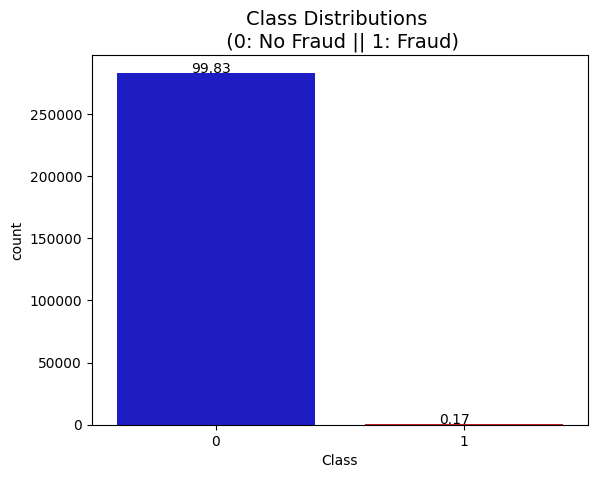

In [14]:
# This code differentiate between the two classes contained in the proportion with a barplot
colors = ["#0101DF", "#DF0101"]

ax = sns.countplot(x='Class', data=df, palette=colors,order = df["Class"].value_counts().index)
for p, label in zip(ax.patches, round(df["Class"].value_counts()/len(df)*100,2)):
  ax.annotate(label, (p.get_x()+0.3, p.get_height()+0.15))
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)


This statement correctly highlights that the majority of the transactions in the dataset have a class label of 0, indicating that they are non-fraudulent. This suggests that fraudulent transactions are indeed rare, accounting for only a small portion of the total transactions. However, it's important to note that the low frequency of fraudulent transactions may make them harder to detect and may require specialized techniques and algorithms. Additionally, it's crucial to consider that the class imbalance can impact the evaluation of any model or algorithm used for fraud detection, and appropriate measures such as resampling or adjusting the decision threshold may be needed to address this issue.

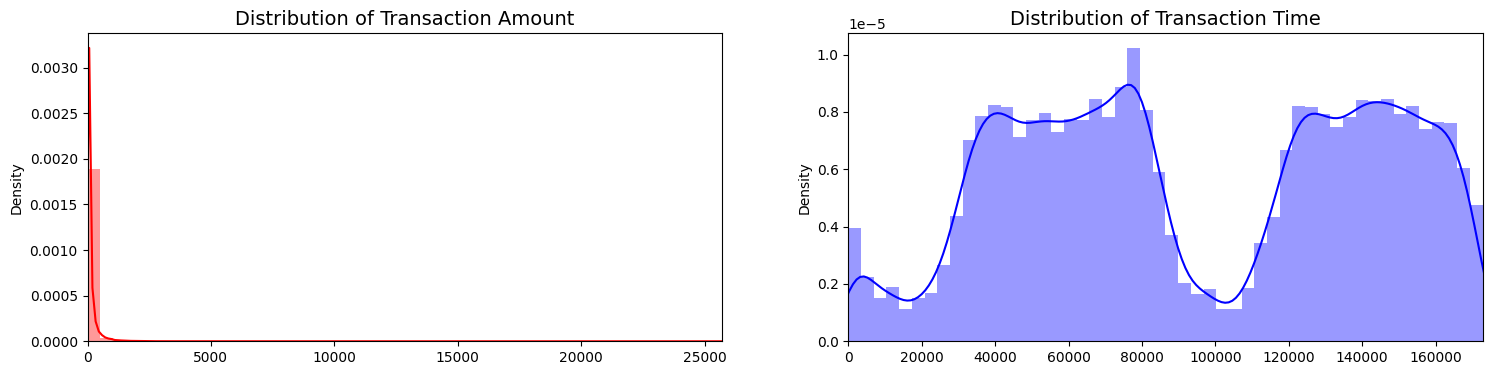

In [15]:
# This code print the distribution of the transaction time and amount


fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

# The transaction amount

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

#  The transaction Time 
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [16]:
# This is the description of the transaction Time
print(f'The Transaction Time is distributed in this way \n{df.Time.describe()}')

The Transaction Time is distributed in this way 
count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64


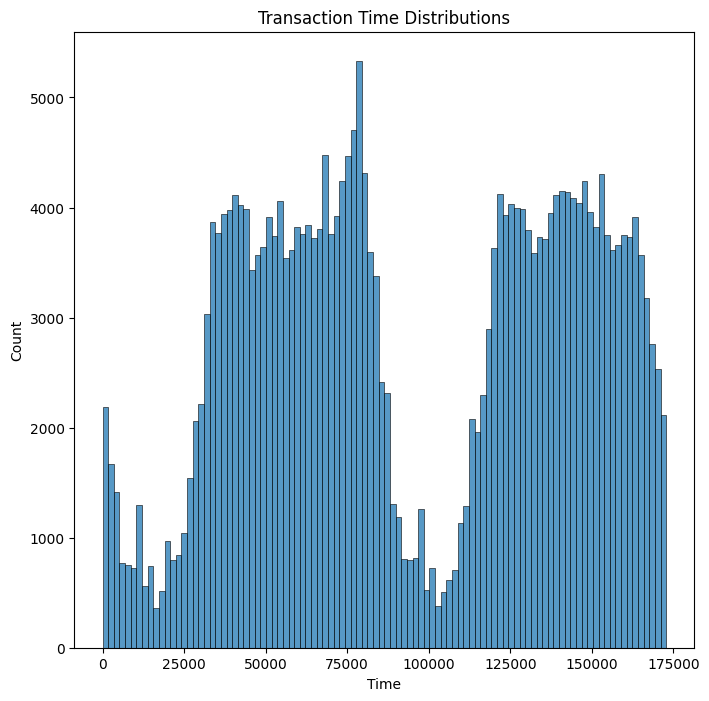

In [17]:
# This code plot the distribution of the transaction time 

plt.figure(figsize=(8,8))
plt.title('Transaction Time Distributions')
sns.histplot(df['Time'], bins=100)
plt.show()

Text(0.5, 1.0, "Correlation Matrix \n (don't use for reference)")

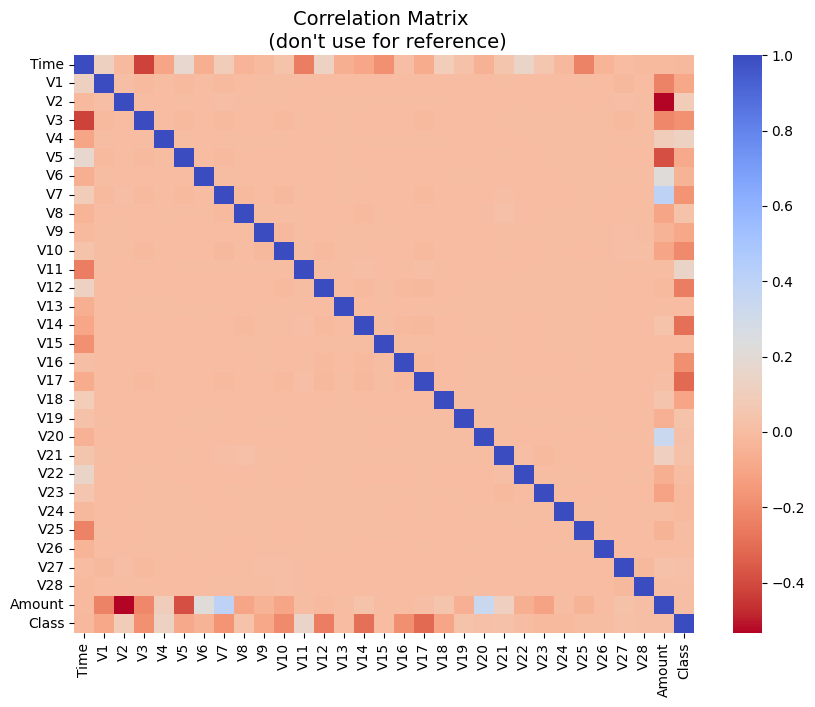

In [18]:
# Make sure we use the subsample in our correlation

plt.figure(figsize=(10,7.5))

# Entire DataFrame
corr = df.corr()
ax = sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Correlation Matrix \n (don't use for reference)", fontsize=14)

In [19]:
# PLot the pairplot of the data

# sns.pairplot(df)

From this we find out that most columns are negatively correlated to the targeted variable - "Class" 

## 3. Data Preprocessing

In [20]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler

# Std_Scaler is less prone to outliers.

std_scaler = StandardScaler()


df['Amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))



StandardScaler is a popular preprocessing technique used in machine learning to standardize features by scaling them to have a mean of 0 and a standard deviation of 1. It's based on the assumption that the distribution of the features is Gaussian (or normal). StandardScaler transforms the features in a way that the mean of each feature is centered at 0, and the variance is scaled to 1. This technique can be applied to both continuous and discrete data, and it's useful when the features have different scales or units of measurement. StandardScaler is often used as a preliminary step before applying machine learning algorithms, as it can improve the performance of the model and make the optimization process more stable.

In [21]:
# recheck your data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99833466 0.00166534]
[0.99832584 0.00167416]


The data is being split into five different training and testing sets using cross-validation. The percentage of non-fraudulent transactions in the dataset is very high (99.83%), while the percentage of fraudulent transactions is very low (0.17%). The label distribution of the training and testing sets shows a similar percentage split. This indicates that the class imbalance is being maintained during the split, which is important for training and testing the model on realistic data.

## 4. Undersampling

In [23]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:473]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6734,-1.818836,0.314597,2.660670,-5.920037,4.522500,-2.315027,-2.278352,-4.684054,1.202270,-0.694696,...,0.743314,0.064038,0.677842,0.083008,-1.911034,0.322188,0.620867,0.185030,-0.349333,1
15506,-1.430301,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,...,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,0.045996,1
3182,-1.938779,-1.202498,-0.633223,0.870420,0.094152,2.428689,0.437055,0.221038,0.206282,-0.031841,...,0.016659,-0.066338,-0.103541,-1.726775,0.123752,-0.474517,-0.069801,-0.079934,-0.171617,0
88258,-0.689794,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,...,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,-0.326889,1
151196,0.002968,0.842025,-0.365518,-2.464063,4.820886,0.775505,-0.614785,1.368024,-0.526262,-0.121356,...,-0.110622,-1.257800,-0.324418,-0.420020,-0.219501,-0.268873,-0.144582,0.104464,1.928951,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


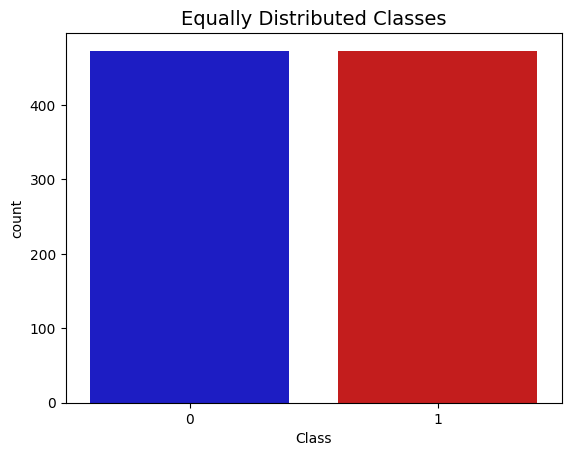

In [24]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


# THis code produce equal distribution of both classes
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

The subsample dataset has an equal distribution of the two classes (fraudulent and non-fraudulent), with 50% of the transactions labeled as fraudulent (Class=1) and the other 50% labeled as non-fraudulent (Class=0). This balanced distribution is often desirable in machine learning tasks, as it helps prevent bias in the model towards the majority class. he subsample dataset has an equal distribution of the two classes (fraudulent and non-fraudulent), with 50% of the transactions labeled as fraudulent (Class=1) and the other 50% labeled as non-fraudulent (Class=0). This balanced distribution is often desirable in machine learning tasks, as it helps prevent bias in the model towards the majority class.

### 4.1 Correlation Matrix

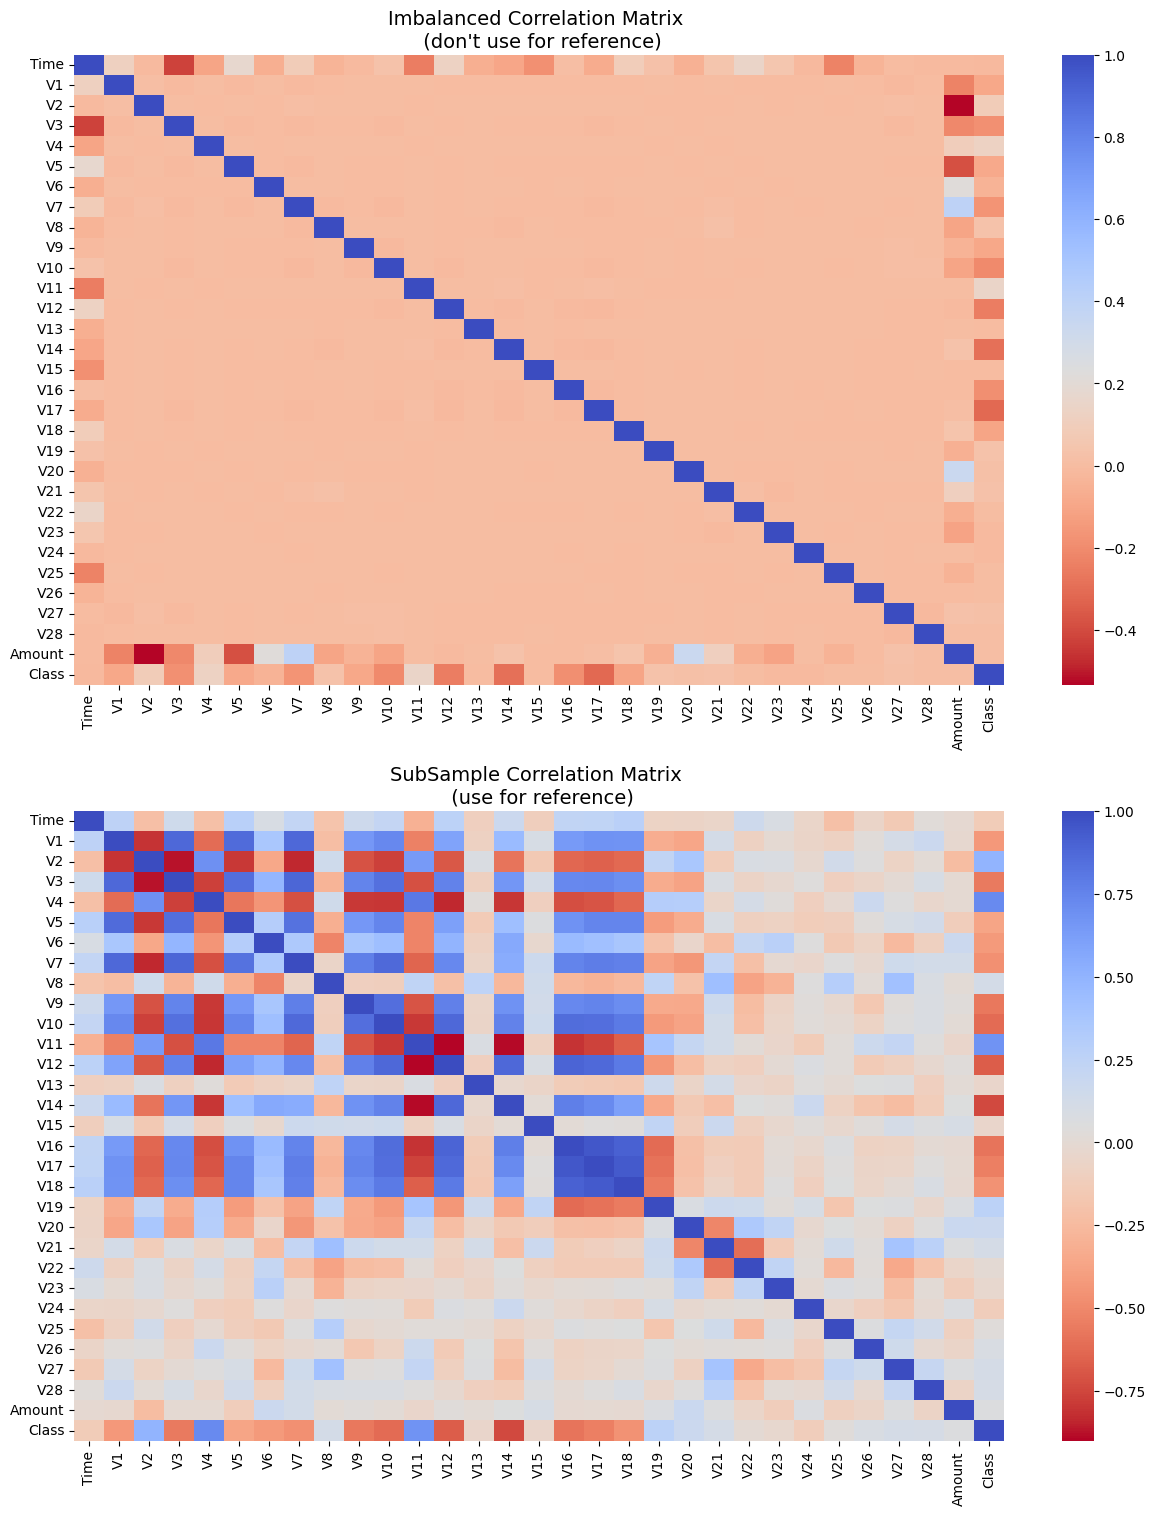

In [25]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,18))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

# The Subsample DataFrane
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()


This code block generates a heatmap of the correlation matrix for the original imbalanced dataset (df) and the subsampled dataset (new_df). The figsize parameter sets the size of the plot, and the sns.heatmap() function is used to create the heatmap with the specified colormap (cmap) and annotation font size (annot_kws).

The first plot (ax1) shows the correlation matrix for the imbalanced dataset. This plot should not be used as a reference because the class imbalance can lead to misleading correlations. The second plot (ax2) shows the correlation matrix for the subsampled dataset and should be used as a reference for feature selection and model building. The correlation matrix is a useful tool for identifying highly correlated features, which can help in reducing the dimensionality of the dataset and improving the performance of the machine learning models.

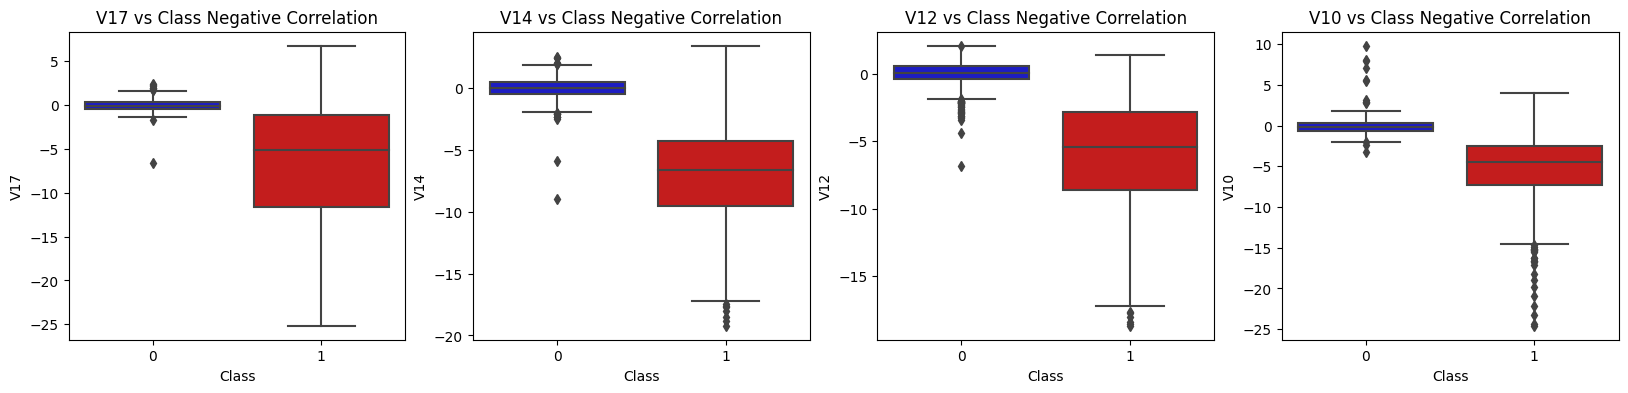

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

# Class vs V17
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

# Class vs V14
sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

# Class vs V12
sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

# Class vs V10
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

The code above creates four box plots with the variables V17, V14, V12, and V10 in the x-axis and the Class variable in the y-axis. The Class variable has two possible values: 0 and 1, where 0 represents a non-fraudulent transaction and 1 represents a fraudulent transaction.

The plots show the relationship between the variables and the class, specifically their correlation. In this case, the four variables have a negative correlation with the class, meaning that as the value of the variable decreases, the probability of the transaction being fraudulent increases.

The plots show the distribution of the variables for both classes. The boxes represent the interquartile range (IQR) of the distribution, and the whiskers extend to the most extreme data points within 1.5 times the IQR. Outliers are represented by individual points outside the whiskers.

Overall, the plots suggest that the selected variables may be useful in predicting fraudulent transactions.

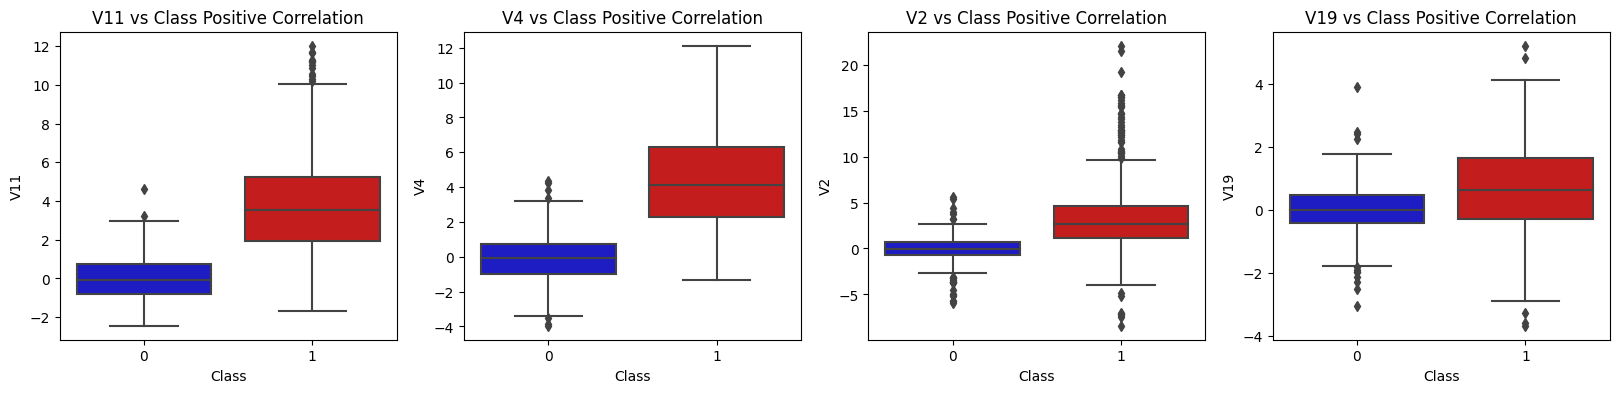

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
# Class vs V11
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

# Class vs V4
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

# Class vs V2
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

# Class vs V19
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

Based on the box plots, we can see that the features with the strongest negative correlations with the target variable (fraud) are V17, V14, V12, and V10. On the other hand, the features with the strongest positive correlations with the target variable are V11, V4, V2, and V19. These features can be useful for detecting fraud transactions.

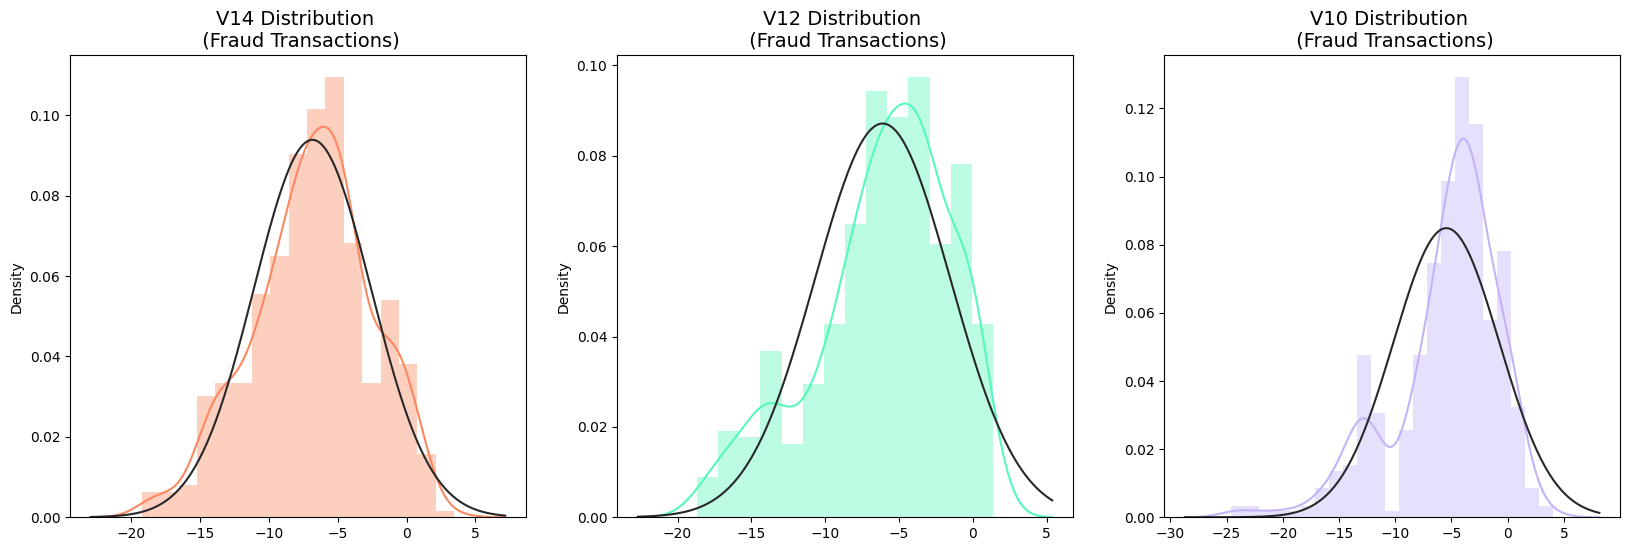

In [28]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

# This code plots the V14 Distribution of the fraud transactions
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)\

# This code plots the V12 Distribution of the fraud transactions
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# This code plots the V10 Distribution of the Fraud transactions
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

These three plots show the distribution of three features (V14, V12, V10) for the fraudulent transactions in the subsample dataset. Each plot also includes a normal distribution curve fitted to the data.

The first plot shows the V14 feature, which has a bimodal distribution with peaks around -8 and -2.5. The normal distribution curve doesn't fit the data very well, which indicates that the V14 feature is not normally distributed. This feature may be useful in detecting fraudulent transactions, as there seems to be a higher frequency of fraudulent transactions with low values of V14.

The second plot shows the V12 feature, which has a unimodal distribution with a peak around -2.5. The normal distribution curve fits the data well, indicating that the V12 feature is approximately normally distributed. This feature may also be useful in detecting fraudulent transactions, as there seems to be a higher frequency of fraudulent transactions with low values of V12.

The third plot shows the V10 feature, which has a unimodal distribution with a peak around -6. The normal distribution curve doesn't fit the data very well, which indicates that the V10 feature is not normally distributed. This feature may still be useful in detecting fraudulent transactions, as there seems to be a higher frequency of fraudulent transactions with low values of V10.



In [29]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)
# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.50514082568186 | Quartile 75: -4.25246559869278
iqr: 5.25267522698908
Cut Off: 7.87901284048362
V14 Lower: -17.38415366616548
V14 Upper: 3.62654724179084
Feature V14 Outliers for Fraud Cases: 7
V10 outliers:[-17.4759212828566, -17.6206343516773, -18.8220867423816, -19.2143254902614, -18.0499976898594, -18.4937733551053, -17.7216383537133]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -16.971245282033493
V12 Upper: 5.672071569485119
V12 outliers: [-17.003289445516, -17.1829184301947, -18.6837146333443, -17.1504052507291, -18.5536970096458, -18.0475965708216, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 7
Number of Instances after outliers removal: 932
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

This code removes outliers from the 'V14', 'V12', and 'V10' features in the dataset.

It first calculates the first and third quartiles (q25 and q75) of each feature for fraud cases only, and then computes the interquartile range (IQR) as the difference between q75 and q25. It then defines a cut-off point as 1.5 times the IQR, and uses this cut-off point to define the upper and lower limits of the distribution.

Any data point outside of these limits is considered an outlier and is removed from the dataset using the Pandas drop() method. Finally, it prints the number of instances in the dataset after removing the outliers

### 4.2 Removal of Outliers

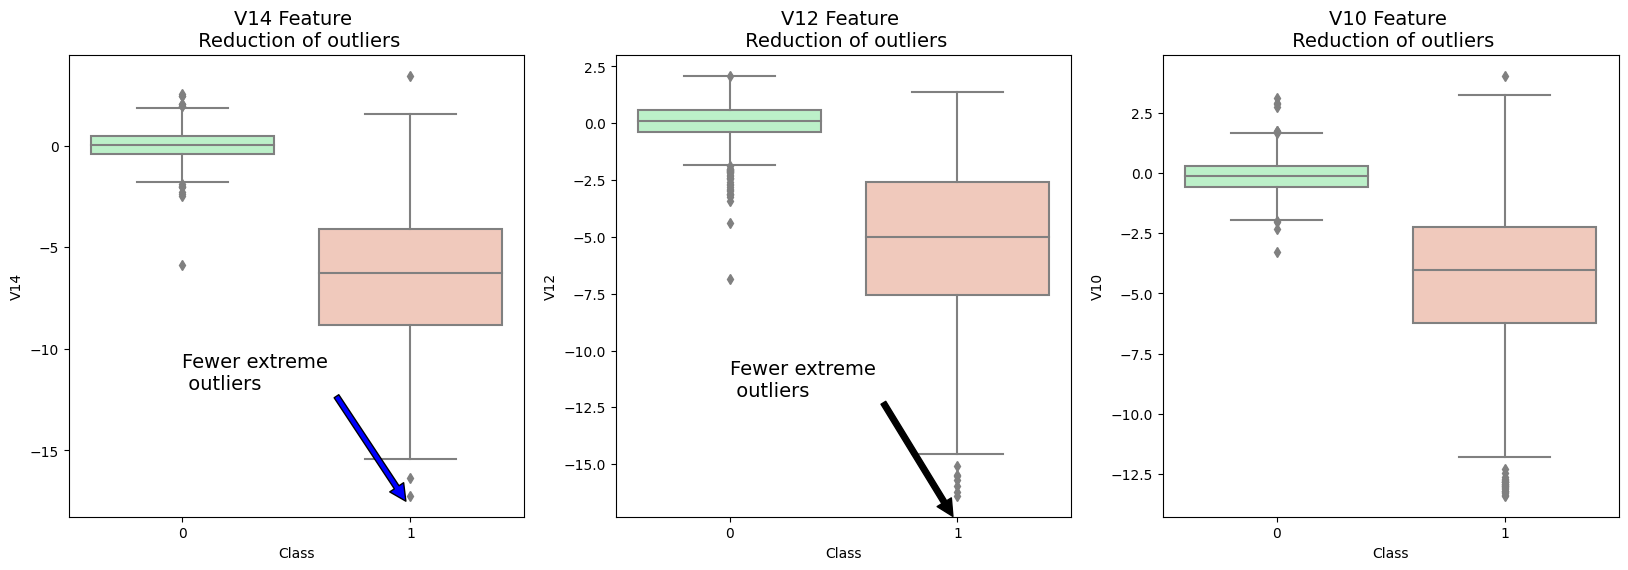

In [30]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='blue'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

This code block creates three boxplots with outliers removed for the features V14, V12, and V10. The boxplots show the distribution of each feature for the two classes, fraud (Class 1) and non-fraud (Class 0).

The first line of code creates a figure with three subplots of size 20x6.

The second line defines the colors for the two classes.

The next three lines create the three boxplots, with the x-axis being the class (0 or 1) and the y-axis being the feature value (V14, V12, or V10). The data used for the boxplots is the new_df DataFrame with outliers removed for these features.

The ax.annotate() function is used to add annotations to each plot. The annotation is a text box that points to a specific location on the plot. The annotations indicate that there are fewer extreme outliers in the data after removing the outliers.

The last line of code shows the plot.

### 4.3 Reduction of Dimensionality

In [31]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 7.1 s
PCA took 0.011 s
Truncated SVD took 0.0078 s


This code is implementing three different dimensionality reduction techniques on the X data: T-SNE, PCA, and TruncatedSVD.

T-SNE (t-Distributed Stochastic Neighbor Embedding) is a technique for dimensionality reduction that is particularly useful for visualizing high-dimensional data. It works by trying to preserve the distances between data points in a lower-dimensional space, with an emphasis on preserving the distances between nearby points. The TSNE function from the sklearn.manifold module is being used here to reduce the X data to two dimensions.

PCA (Principal Component Analysis) is a well-known technique for dimensionality reduction that works by finding the principal components (linear combinations of the original features) that explain the most variance in the data. The PCA function from the sklearn.decomposition module is being used here to reduce the X data to two dimensions.

TruncatedSVD (Truncated Singular Value Decomposition) is another technique for dimensionality reduction that is similar to PCA, but is more efficient for sparse data. It works by finding the largest singular values and corresponding singular vectors of a matrix, which can be used to represent the data in a lower-dimensional space. The TruncatedSVD function from the sklearn.decomposition module is being used here to reduce the X data to two dimensions. The various method of reducing dimensionality carried out and the Truncated SVD took the less time of the bunch.   

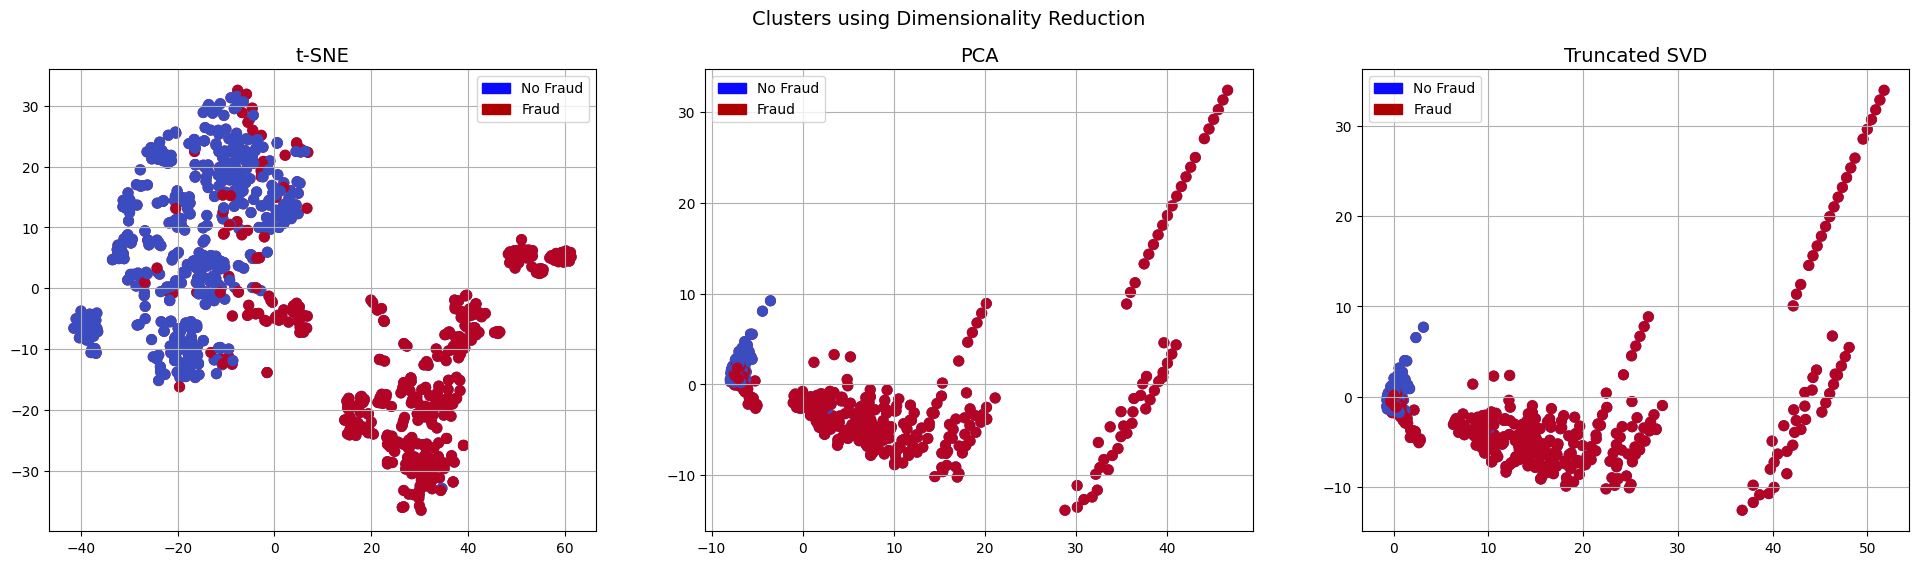

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

This code generates a visualization of the dataset using three different dimensionality reduction techniques: t-SNE, PCA, and TruncatedSVD. The reduced feature vectors are plotted on a scatter plot with the class labels (fraud or no fraud) indicated by the color of the points.

The first line of code initializes a figure with three subplots (axes) arranged horizontally using the subplots method from the matplotlib.pyplot library. The figsize parameter sets the size of the figure.

The suptitle method sets a super title for the entire figure.

Next, three scatter plots are created, one for each dimensionality reduction technique, using the scatter method from the matplotlib.pyplot library. Each scatter plot shows the reduced feature vectors as points on a 2D plot. The c parameter sets the color of the points based on the class label, with blue indicating no fraud and red indicating fraud. The label parameter sets the text label for each class.

The set_title method sets a title for each subplot, and the grid method adds a grid to each plot.

Finally, the legend method adds a legend to each plot showing the mapping between the class labels and the colors. The handles parameter is a list of matplotlib.patches.Patch objects, each with a color and label for the corresponding class label.

The show method displays the plot.

### 4.4 Undersampling before Cross Validating

In [33]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [34]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [35]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [36]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostClassifier": GradientBoostingClassifier()
}

This code block defines a dictionary called classifiers that contains instances of six different classification models from scikit-learn. These models are:

LogisticRegression: A linear model that estimates the probability of belonging to a class using a logistic function.

KNeighborsClassifier: A non-parametric model that assigns the class of the k-nearest neighbors in the feature space.

SVC: A model that finds the hyperplane that best separates the classes in a high-dimensional space.

DecisionTreeClassifier: A model that recursively partitions the feature space into smaller regions by optimizing the impurity of the resulting subsets.

RandomForestClassifier: An ensemble model that fits many decision trees on randomly sampled subsets of the data and features, and aggregates their predictions.

GradientBoostingClassifier: An ensemble model that fits decision trees in a forward stage-wise manner, where each tree corrects the mistakes of the previous ones.

These classifiers will be used to evaluate the performance of the credit card fraud detection models.

In [37]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 94.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 95.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 94.0 % accuracy score


The code above uses cross-validation to evaluate the performance of each classifier on the training data. It prints the average accuracy score across all folds for each classifier.
Note that the __class__.__name__ attribute is used to extract the name of the classifier type as a string, which is then printed alongside its performance score.


### 4.5 Hyperparameter Tuning using GridSearchCV

In [38]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNearest Neighbors
knears_params = {"n_neighbors": list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Decision Tree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2, 4, 1)), 
               "min_samples_leaf": list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

# Random Forest Classifier
RF_params = {"n_estimators": [200, 500], "max_features": ["auto", "sqrt", "log2"],
             "max_depth" : [4, 6, 8], "criterion" : ["gini", "entropy"]}
grid_RFC = GridSearchCV(RandomForestClassifier(), RF_params)
grid_RFC.fit(X_train, y_train)
RF_clf = grid_RFC.best_estimator_

# Gradient Boosting Classifier
GradBoost_params = {"loss": ["deviance"], "learning_rate": [0.01, 0.1, 0.15],
                    "min_samples_split": np.linspace(0.1, 0.5, 6), "min_samples_leaf": np.linspace(0.1, 0.5, 6),
                    "max_depth": [3, 5, 8], "max_features": ["log2", "sqrt"],
                    "criterion": ["friedman_mse", "mae"], "subsample": [0.5, 0.8, 0.9, 1.0],
                    "n_estimators": [10]}
grid_GradBoost = GridSearchCV(GradientBoostingClassifier(), GradBoost_params)
grid_GradBoost.fit(X_train, y_train)
GradBoost_clf = grid_GradBoost.best_estimator_


The code is an example of using the GridSearchCV function from the scikit-learn library to perform hyperparameter tuning for different machine learning models. Hyperparameter tuning is the process of selecting the best combination of hyperparameters for a model to optimize its performance on a given dataset.

The code first defines a set of hyperparameters and their potential values for each of the following models: Logistic Regression, KNearest Neighbors, Support Vector Classifier, Decision Tree Classifier, Random Forest Classifier, and Gradient Boosting Classifier.

Then, for each model, the GridSearchCV function is called with the hyperparameter set and the training dataset to search for the best combination of hyperparameters using a cross-validation approach. The resulting best estimator for each model is stored in a separate variable.

### 4.6 Overfitting Case

In [39]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

RFC_score = cross_val_score(RF_clf, X_train, y_train, cv=5)
print('RandomForest Classifier Cross Validation Score', round(RFC_score.mean() * 100, 2).astype(str) + '%')

GradBoost_score = cross_val_score(GradBoost_clf, X_train, y_train, cv=5)
print('GradientBoost Classifier Cross Validation Score', round(GradBoost_score.mean() * 100, 2).astype(str) + '%')



Logistic Regression Cross Validation Score:  94.56%
Knears Neighbors Cross Validation Score 93.72%
Support Vector Classifier Cross Validation Score 94.14%
DecisionTree Classifier Cross Validation Score 92.89%
RandomForest Classifier Cross Validation Score 94.84%
GradientBoost Classifier Cross Validation Score 94.42%


This code is performing cross-validation on the different classifiers that were trained earlier using the GridSearchCV() function.

For each classifier, the cross_val_score() function is used to perform k-fold cross-validation, where k=5. The mean score is then calculated across the 5 folds and printed to the console as a percentage.

The first block of code calculates the cross-validation score for Logistic Regression, the second block calculates the score for KNearest Neighbors, the third for Support Vector Classifier, the fourth for Decision Tree Classifier, the fifth for Random Forest Classifier, and the last for Gradient Boosting Classifier.

Overall, this code evaluates the performance of different classifiers on the given dataset using cross-validation.

### 4.7 Undersampling During Cross Validation 

In [40]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 51777  52183  52283 ... 283723 283724 283725] Test: [    0     1     2 ... 56755 56756 56757]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 51777  52183  52283 ... 113504 113505 113506]
Train: [     0      1      2 ... 283723 283724 283725] Test: [105403 105641 107841 ... 170251 170252 170253]
Train: [     0      1      2 ... 283723 283724 283725] Test: [160826 161378 162490 ... 226986 226987 226988]
Train: [     0      1      2 ... 226986 226987 226988] Test: [222738 223532 223554 ... 283723 283724 283725]
NearMiss Label Distribution: Counter({0: 473, 1: 473})


This code performs cross-validation using the NearMiss undersampling technique to balance the data. The process begins by splitting the data into train and test sets using StratifiedShuffleSplit. Then, NearMiss is applied to the training data with a sampling strategy of "majority". Next, a pipeline is created with NearMiss and logistic regression using imbalanced_make_pipeline. The pipeline is then fit on the training data and used to make predictions on the test data. Finally, the accuracy, precision, recall, F1 score, and AUC are calculated and appended to their respective lists. This process is repeated for each train-test split in sss.split(undersample_Xtrain, undersample_ytrain).

### 4.8 Logistic Regression Learning Curve

In [41]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, estimator5, estimator6, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3,ncols=2,figsize=(18,20),sharey=True)
    if ylim is not None: 
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    
    #Fifth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator5, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax5.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax5.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax5.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax5.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax5.set_title("Random Forest Learning Curve", fontsize=14)
    ax5.set_xlabel('Training size (m)')
    ax5.set_ylabel('Score')
    ax5.grid(True)
    ax5.legend(loc="best")
    
#     Sixth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator6,X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax6.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax6.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax6.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax6.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax6.set_title("Gradient Boost Learning Curve", fontsize=14)
    ax6.set_xlabel('Training size (m)')
    ax6.set_ylabel('Score')
    ax6.grid(True)
    ax6.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\Olayinka Akerekan\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

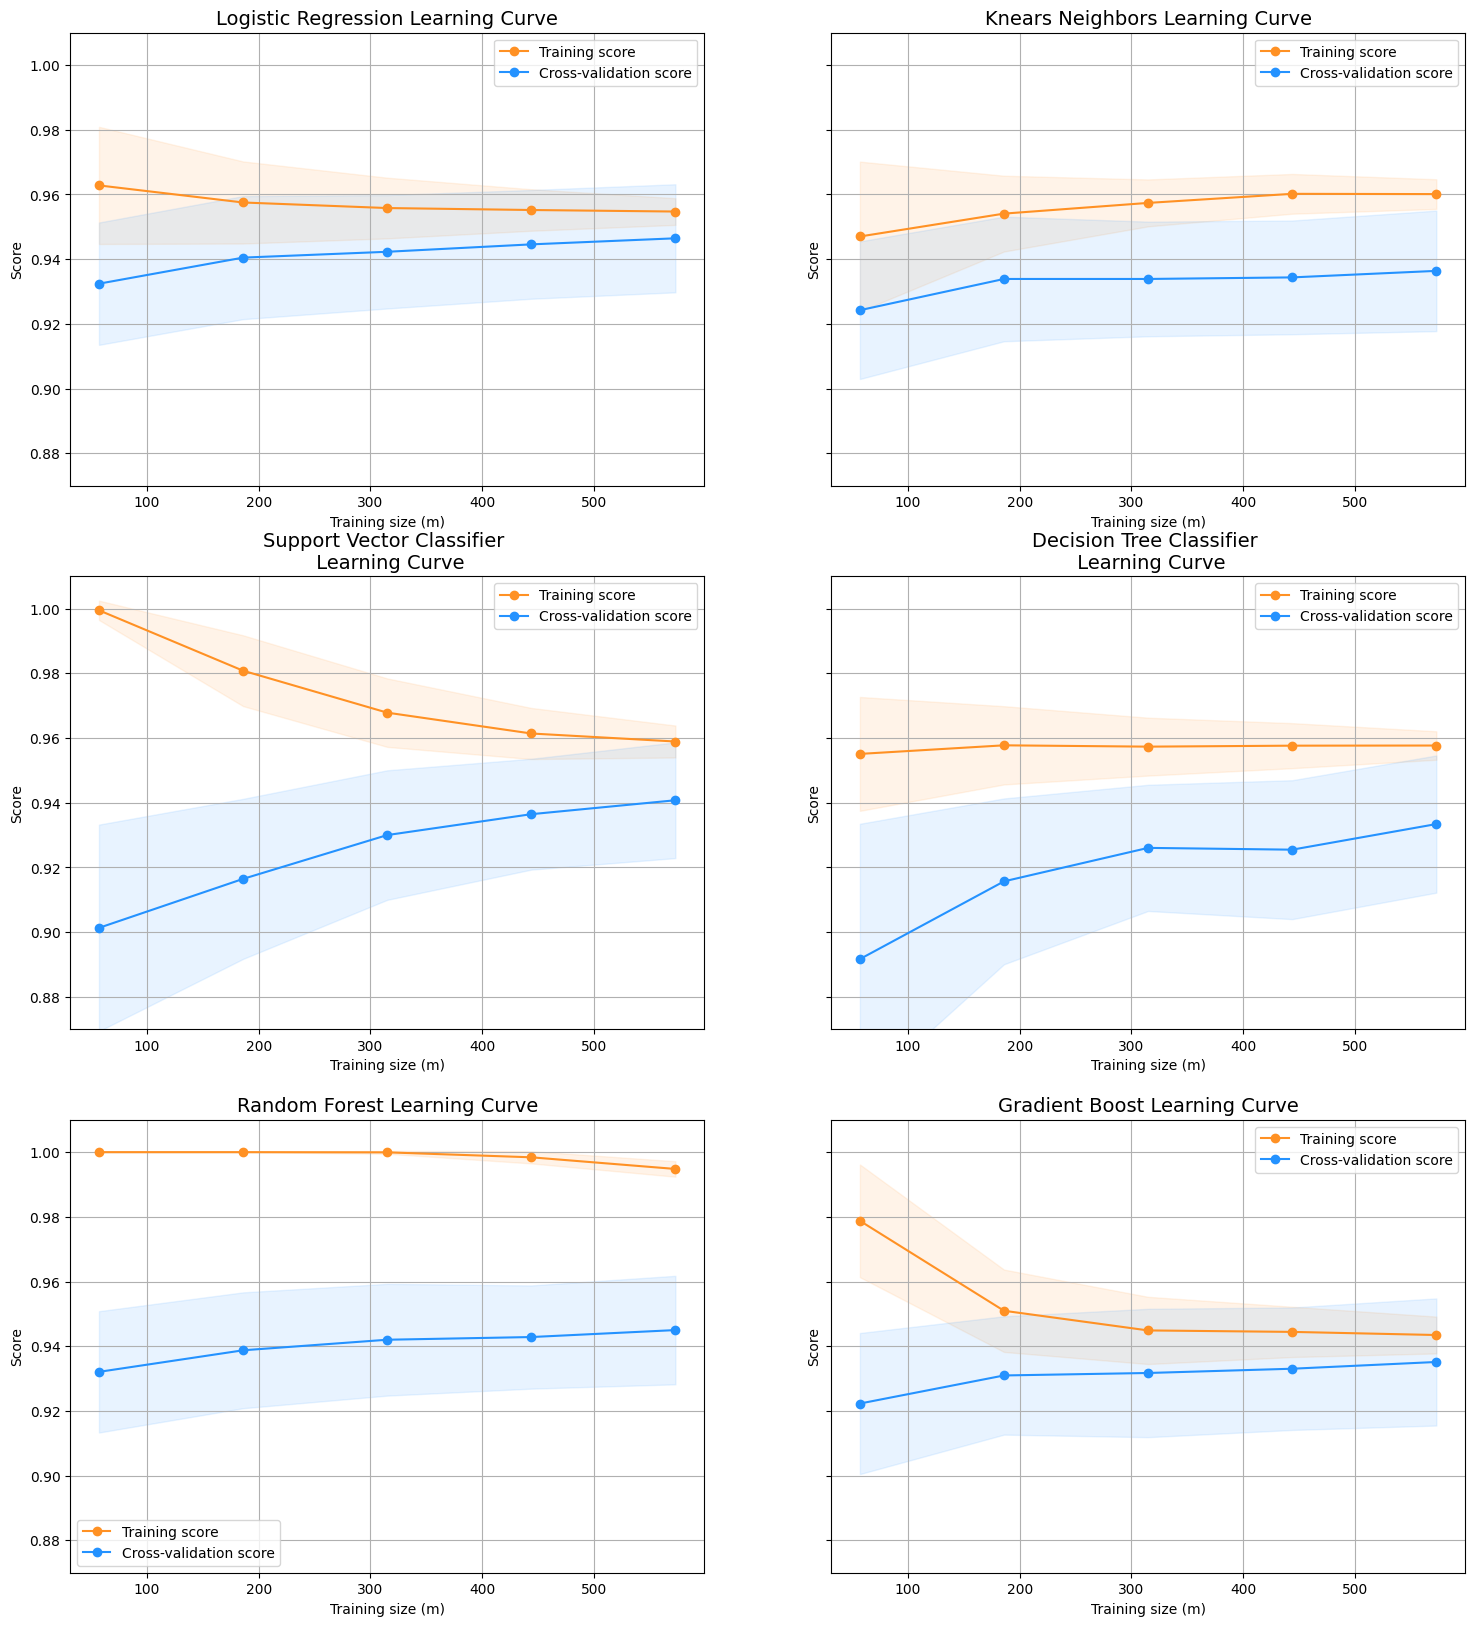

In [42]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42) 
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf,RF_clf,GradBoost_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

The ShuffleSplit function is being used to generate 100 random splits of the data with a test set size of 0.2 and a random seed of 42. The resulting splits will be used to evaluate the performance of several classifiers, namely log_reg, knears_neighbors, svc, tree_clf, RF_clf, and GradBoost_clf, using the plot_learning_curve function.

The plot_learning_curve function likely generates learning curves for each classifier by plotting the training and validation performance (e.g., accuracy, F1 score) against the number of training examples. The X_train and y_train variables likely contain the training data and labels, respectively. The (0.87, 1.01) argument may represent the y-axis limits of the plot. Finally, the n_jobs parameter likely specifies the number of CPU cores to use for parallelization.

### 4.9 ROC_Curve

In [43]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

RF_pred = cross_val_predict(RF_clf, X_train, y_train, cv=5)

GradBoost_pred = cross_val_predict(GradBoost_clf, X_train, y_train, cv=5)



This code creates predictions for each classifier using the cross_val_predict function from scikit-learn's model_selection module. The cross_val_predict function uses cross-validation to generate predictions for each data point in the training set. For logistic regression and support vector machines, it uses the decision_function method to obtain the predicted scores, while for k-nearest neighbors, decision trees, random forests, and gradient boosting, it uses the default predict method to obtain the predicted classes.

The output of cross_val_predict is an array of predicted scores or classes, which will be used to generate ROC curves for each classifier.

### 4.10 ROC_AUC_Score

In [44]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('Random Forest: ', roc_auc_score(y_train, RF_pred))
print('Gradient Boost: ', roc_auc_score(y_train, GradBoost_pred))


Logistic Regression:  0.9838209982788295
KNears Neighbors:  0.9340948208418087
Support Vector Classifier:  0.9794163667657644
Decision Tree Classifier:  0.9265099358472852
Random Forest:  0.9423016742293852
Gradient Boost:  0.9349788765451416


This code computes the area under the receiver operating characteristic (ROC) curve for each of the six classifiers (Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier, Random Forest, and Gradient Boost) that were previously trained using cross-validation on the training set.

The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for different classification thresholds. The area under the ROC curve (AUC) is a measure of the classifier's ability to distinguish between positive and negative classes, with values ranging from 0 to 1. A value of 0.5 indicates that the classifier is no better than random, while a value of 1.0 indicates perfect classification performance.

The roc_auc_score function from Scikit-learn's metrics module is used to compute the AUC for each classifier based on their predicted scores for the training set (log_reg_pred, knears_pred, svc_pred, tree_pred, RF_pred, and GradBoost_pred) and the actual target labels (y_train). The results are printed to the console.

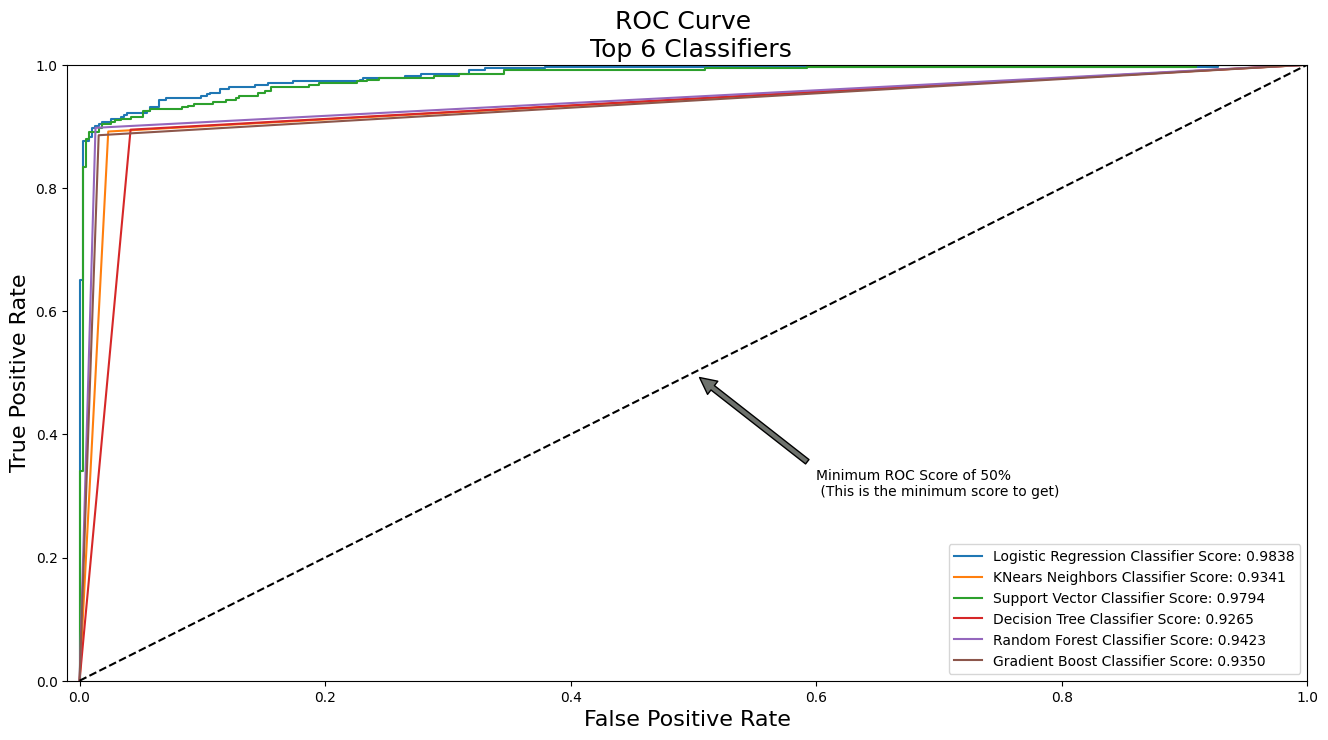

In [45]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
RF_fpr, RF_tpr, RF_threshold = roc_curve(y_train, RF_pred)
GradBoost_fpr, GradBoost_tpr, GradBoost_threshold  = roc_curve(y_train, GradBoost_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 6 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train, RF_pred)))
    plt.plot(GradBoost_fpr,GradBoost_tpr,label = 'Gradient Boost Classifier Score: {:.4f}'.format(roc_auc_score(y_train, GradBoost_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

This code generates a graph of the ROC (Receiver Operating Characteristic) curves for six different classifiers (Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, Decision Tree Classifier, Random Forest, and Gradient Boost).

The ROC curve shows the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) for different classification thresholds. The closer the curve is to the top-left corner, the better the classifier's performance. The area under the ROC curve (AUC) is a measure of the overall performance of the classifier, where an AUC of 0.5 means random guessing and an AUC of 1.0 means perfect classification.

The code calculates the false positive rate, true positive rate, and threshold values for each classifier using the roc_curve() function from scikit-learn's metrics module. It then uses these values to plot the ROC curves for each classifier using matplotlib.

The graph_roc_curve_multiple() function takes the false positive rate, true positive rate, and labels for each classifier as input and plots the ROC curves on the same graph. It also adds a legend with the AUC score for each classifier and an annotation indicating the minimum ROC score of 50%. Finally, the function displays the plot using the plt.show() function.

### 4.10 Precision_Recall_Curve

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

The precision_recall_curve() function from the sklearn.metrics module takes in two arguments - the true labels (y_train), and the predicted scores (log_reg_pred in this case), and returns three arrays - precision, recall, and threshold.

precision : An array of precision values corresponding to different thresholds.
recall : An array of recall values corresponding to different thresholds.
threshold : An array of probability thresholds.
The values of precision and recall correspond to the probability threshold values in the threshold array. The precision-recall curve plots precision against recall at different probability thresholds. It is useful in cases where the classes are imbalanced or the cost of false positives and false negatives is not equal.

### 4.11 Recall_score, Precision_Score, f1_score, Accuracy_score

In [47]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.75
F1 Score: 0.83
Accuracy Score: 0.82
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.79
Precision Score: 0.00
Recall Score: 0.19
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


This code calculates various classification metrics for the logistic regression model, both in the case of overfitting and the desired performance.

y_pred = log_reg.predict(X_train) predicts the target variable y using the trained logistic regression model on the training set X_train.
recall_score(y_train, y_pred), precision_score(y_train, y_pred), f1_score(y_train, y_pred), and accuracy_score(y_train, y_pred) compute the recall, precision, F1-score, and accuracy of the logistic regression model predictions y_pred compared to the true target variable y_train.
np.mean(undersample_accuracy), np.mean(undersample_precision), np.mean(undersample_recall), and np.mean(undersample_f1) compute the mean accuracy, precision, recall, and F1-score of the model for the desired performance, which is the case when the data is balanced.
The printed output shows the computed scores for both cases. The first block of code shows the scores for the overfitting case, which happens when the model learns the noise and patterns of the training data instead of the underlying patterns of the data. The second block of code shows the scores for the desired performance, which is when the model learns the underlying patterns of the data and generalizes well to new data.

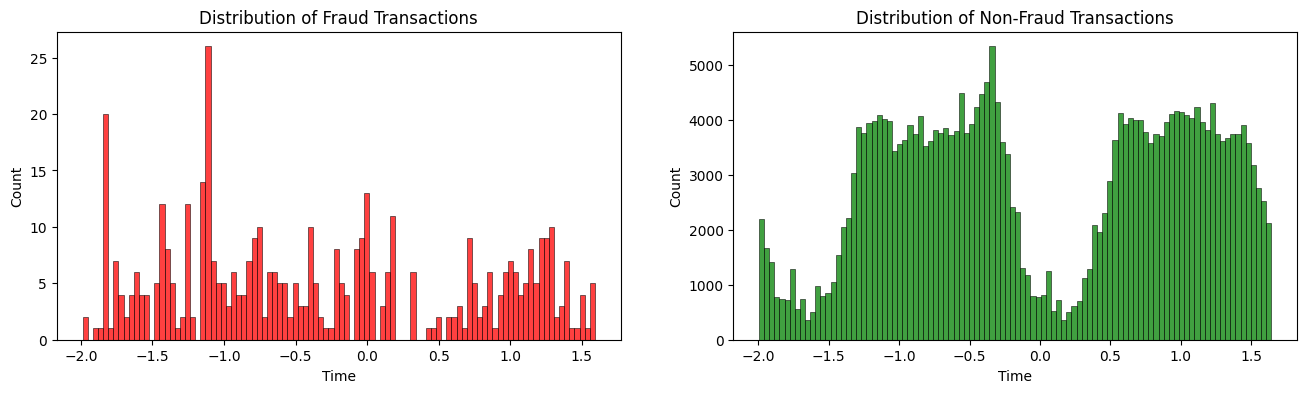

In [48]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.histplot(df[(df['Class'] == 1)]['Time'],bins=100,color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.histplot(df[(df['Class'] == 0)]['Time'], bins=100,color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

This code creates a figure with two subplots side by side using the subplots() function from the matplotlib library. The figure has a size of 16x4 inches.

In the first subplot (axs[0]), the function sns.histplot() from the seaborn library is used to plot a histogram of the Time feature from the df DataFrame, filtered for transactions where the Class column is equal to 1 (fraud transactions). The histogram is divided into 100 bins and is colored red. The subplot is given a title "Distribution of Fraud Transactions".

In the second subplot (axs[1]), the same sns.histplot() function is used to plot a histogram of the Time feature from the df DataFrame, filtered for transactions where the Class column is equal to 0 (non-fraud transactions). The histogram is divided into 100 bins and is colored green. The subplot is given a title "Distribution of Non-Fraud Transactions".

Finally, the figure is displayed using the plt.show() function from the matplotlib library.

### 4.12 Logistic ROC_curve

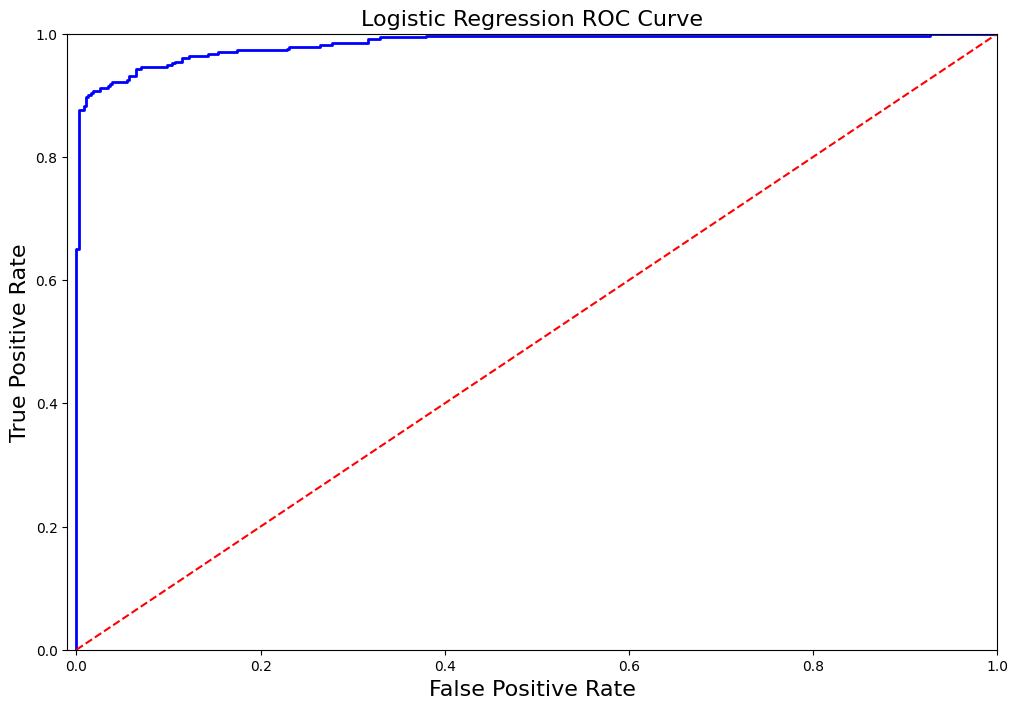

In [49]:
# Plotting the logistic roc curve

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

This code defines a function logistic_roc_curve that takes in false positive rate (log_fpr) and true positive rate (log_tpr) values and plots a ROC (Receiver Operating Characteristic) curve for the logistic regression classifier. The ROC curve is a graphical representation of the performance of a binary classifier, plotting the true positive rate (TPR) against the false positive rate (FPR) for different thresholds. The blue line in the plot represents the TPR against the FPR at different threshold values, while the red dashed line represents a random classifier (TPR = FPR). The function also sets the axis labels and limits, and shows the plot using plt.show().

In [50]:
undersample_y_score = log_reg.decision_function(original_Xtest)

The decision_function method of a trained LogisticRegression classifier in scikit-learn returns the decision function values for each sample in the input data. These values are the signed distances to the hyperplane, where positive values indicate the positive class (fraudulent transactions) and negative values indicate the negative class (legitimate transactions).

In the given code, log_reg is a trained LogisticRegression classifier, and original_Xtest is the original test set, i.e., the test set that has not been undersampled. The decision function values for the samples in original_Xtest are calculated using the decision_function method of log_reg and stored in the variable undersample_y_score.

In [51]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.10


average_precision_score is a function from sklearn.metrics that calculates the average precision (AP) score for a binary classification model.

In this code, undersample_y_score contains the decision function scores for the undersampled test data, which were predicted using the logistic regression model log_reg trained on the undersampled training data. The average_precision_score function is then used to calculate the AP score for this model, using the original (un-undersampled) test data original_Xtest and original_ytest.

The AP score is a metric that measures the area under the precision-recall curve. It provides a single number that summarizes the precision-recall trade-off for a given model. A higher AP score indicates better precision-recall performance.

## 5. Oversampling Technique - SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a method used in imbalanced classification problems to increase the number of samples in the minority class. It works by generating synthetic samples of the minority class by interpolating between existing samples. Specifically, for each minority class sample, SMOTE selects k nearest neighbors and generates synthetic samples by interpolating between the selected sample and its k nearest neighbors.

By generating synthetic samples, SMOTE helps to balance the class distribution and prevent the model from being biased towards the majority class. This can lead to better performance in predicting the minority class.

### 5.1 Precision_Recall_Curve

Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.10')

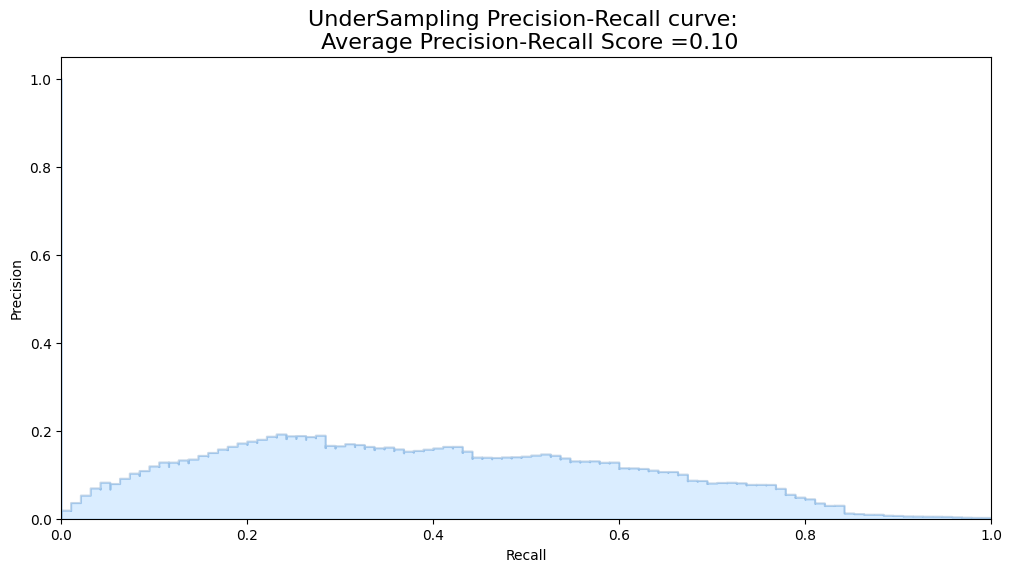

In [52]:

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)


First, the precision, recall, and threshold values are calculated using the precision_recall_curve function from sklearn.metrics, where original_ytest and undersample_y_score are used as the inputs.
Then, a plot is created using matplotlib.pyplot to visualize the precision-recall curve. The step function plt.step is used to draw the curve, and plt.fill_between is used to fill the area under the curve.
The x-axis represents the recall, which is the proportion of true positives correctly identified by the model, and the y-axis represents the precision, which is the proportion of predicted positives that are true positives.
The title of the plot shows the average precision-recall score for the undersampled logistic regression model.

### 5.2 Implementing SMOTE

In [53]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 226981 | Length of y (train): 226981
Length of X (test): 56745 | Length of y (test): 56745
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9373875697767394
precision: 0.05812148336070817
recall: 0.8966666666666667
f1: 0.10714067478794356
---------------------------------------------------------------------------------------------------------------------------------------


This code is implementing the SMOTE (Synthetic Minority Over-sampling Technique) oversampling technique to handle imbalanced data. It is using a logistic regression classifier with penalty and C hyperparameters to predict the minority class. The code is performing randomized search to find the best hyperparameters for the logistic regression classifier.

The code is also performing cross-validation in the right way by implementing the SMOTE technique during cross-validation instead of oversampling before cross-validation. This approach avoids overfitting and provides a more realistic estimate of model performance.

The code is splitting the data into training and test sets using StratifiedShuffleSplit (sss). It is then iterating over the splits and fitting a pipeline that contains the SMOTE oversampling technique and the logistic regression classifier to the training data. The best estimator found through the randomized search is used for prediction on the test set. The code is then computing various performance metrics such as accuracy, precision, recall, F1 score, and AUC (area under the ROC curve) on the test set. Finally, the mean of these performance metrics over all the splits is computed and printed.

In [54]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56650
       Fraud       0.11      0.85      0.19        95

    accuracy                           0.99     56745
   macro avg       0.55      0.92      0.59     56745
weighted avg       1.00      0.99      0.99     56745



This code calculates and prints a classification report comparing the true labels of the test set (original_ytest) with the predicted labels generated by applying the trained best_est model to the test set (smote_prediction).

The classification_report function is part of the sklearn.metrics module and generates a report with precision, recall, F1-score and support for each class, as well as an overall accuracy score. The report is printed for each class (in this case, "No Fraud" and "Fraud") and also includes a weighted average across all classes.

The target_names parameter is used to specify the label names for the two classes, which are defined as a list labels containing the strings "No Fraud" and "Fraud".

### 5.3 Average_Precision_Score

In [55]:
average_precision = average_precision_score(original_ytest, smote_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.09


This code calculates the average precision-recall score for the SMOTE oversampled Logistic Regression model. The average_precision_score function from the sklearn.metrics module is used to calculate the score. This function takes two parameters: the true labels (in this case, original_ytest) and the predicted scores (in this case, smote_prediction). The average precision-recall score is a metric used to evaluate the performance of a binary classification model, which takes into account both precision and recall. It is calculated as the area under the precision-recall curve, and ranges from 0 to 1, with higher values indicating better performance. The result is then printed out to the console.

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.09')

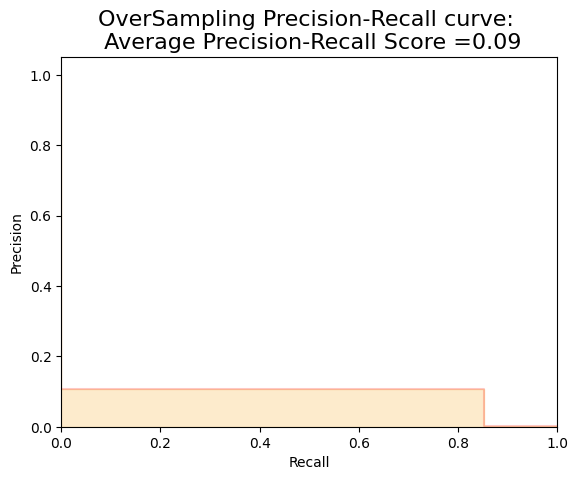

In [56]:
precision, recall, _ = precision_recall_curve(original_ytest, smote_prediction)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

This code is plotting the precision-recall curve for the logistic regression model after applying the SMOTE oversampling technique to the imbalanced data. The precision and recall values are obtained using the precision_recall_curve() function from sklearn.metrics module, which takes the true labels of the test set and the predicted labels by the model as input.

The plt.step() function is then used to plot the precision-recall curve. The color argument sets the color of the curve to red, and alpha sets the transparency level to 0.2. The where argument specifies where to place the steps, and step argument sets the fill style for the curve. The plt.fill_between() function fills the area under the curve. The title of the plot is set using the plt.title() function, which includes the average precision-recall score. The plt.xlabel() and plt.ylabel() functions set the labels for the x and y axes, respectively, and the plt.ylim() and plt.xlim() functions set the limits for the y and x axes, respectively.

In [57]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=1)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

This code performs the Synthetic Minority Over-sampling Technique (SMOTE) on the training data after it has been split and cross-validated. SMOTE is an oversampling technique used to balance the class distribution in imbalanced datasets. In this case, the minority class (fraudulent transactions) is oversampled to match the majority class (non-fraudulent transactions) by creating synthetic samples based on the existing minority samples.

The SMOTE() function from imblearn.over_sampling module is used to oversample the minority class, and the sampling_strategy parameter is set to 'minority' to indicate that only the minority class will be oversampled. The random_state parameter is set to 1 for reproducibility.

The oversampled training data is then stored in Xsm_train and ysm_train variables. Xsm_train contains the feature data, and ysm_train contains the target data. The fit_resample() function of SMOTE class is used to perform oversampling on the training data.

In [58]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :9.54102373123169 sec


This code fits the oversampled data to the logistic regression model and prints the time taken for fitting the data in seconds. The logistic regression model is already fitted with the best hyperparameters using GridSearchCV, and here the oversampled data is used to fit the model. The t0 and t1 variables are used to calculate the time taken for fitting the model. The time taken for fitting the oversampled data gives an idea about the efficiency of the algorithm in handling the increased number of samples after oversampling.

### 5.4 Confusion Matrix

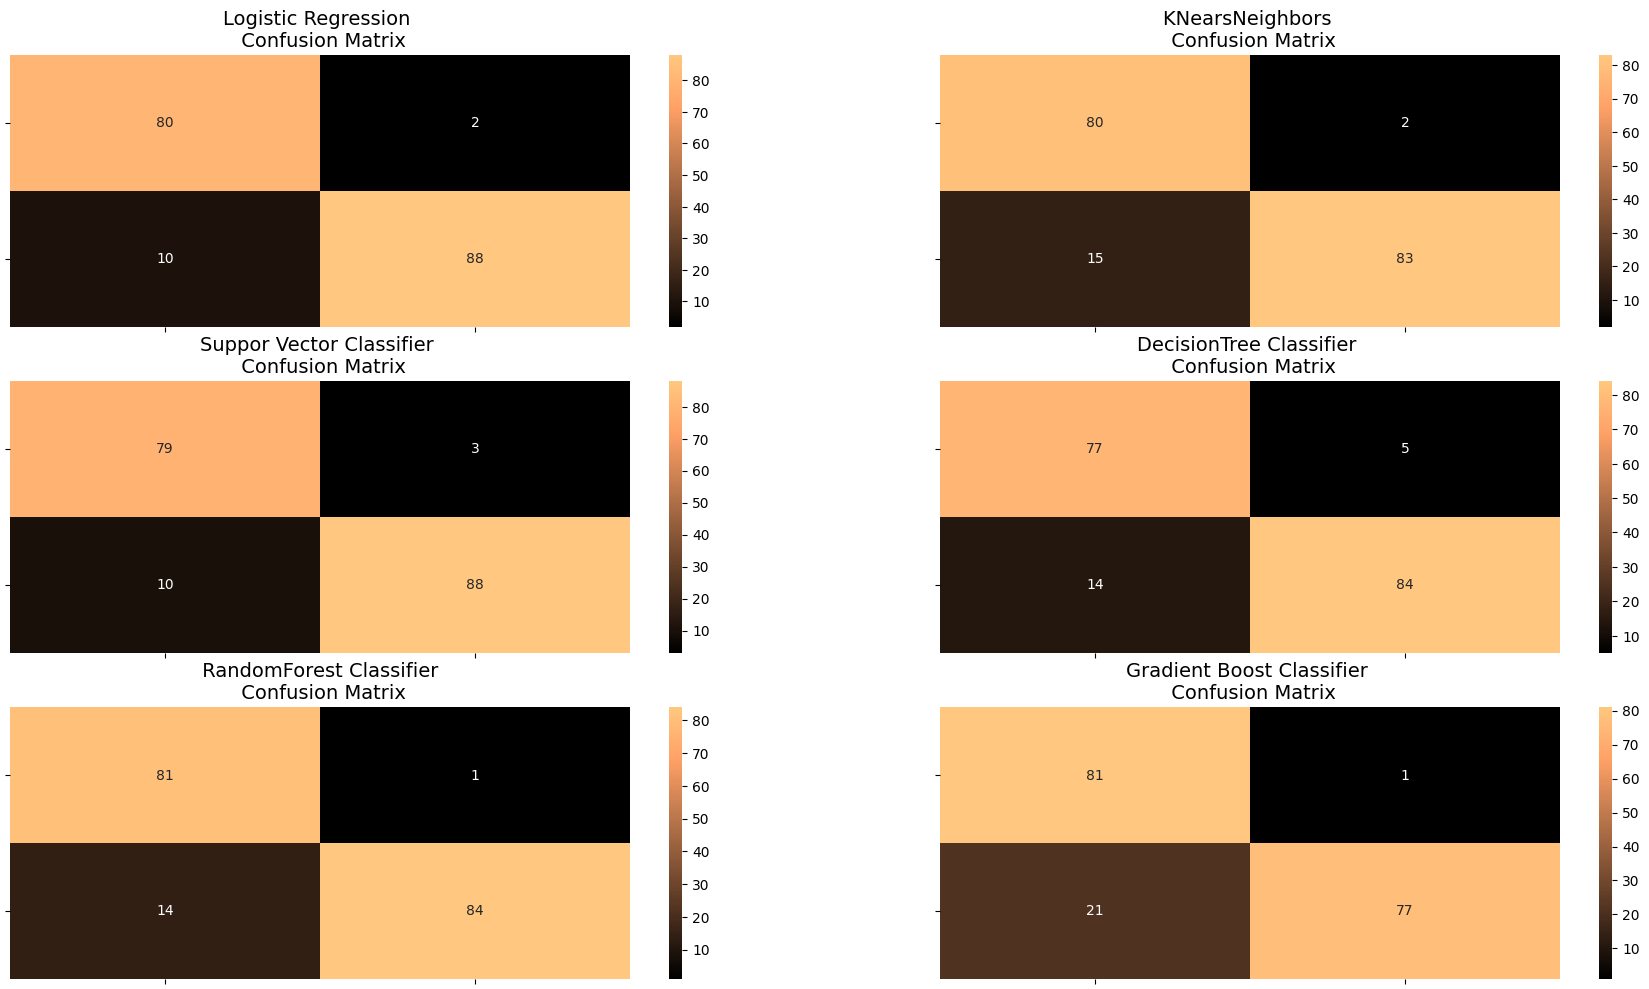

In [59]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)
y_pred_RF = RF_clf.predict(X_test)
y_pred_GradBoost = GradBoost_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)
RF_cf = confusion_matrix(y_test, y_pred_RF)
GradBoost_cf = confusion_matrix(y_test, y_pred_GradBoost)

fig, ax = plt.subplots(3, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(RF_cf, ax=ax[2][0], annot=True, cmap=plt.cm.copper)
ax[2][0].set_title(" RandomForest Classifier \n Confusion Matrix", fontsize=14)
ax[2][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(GradBoost_cf, ax=ax[2][1], annot=True, cmap=plt.cm.copper)
ax[2][1].set_title("Gradient Boost Classifier \n Confusion Matrix", fontsize=14)
ax[2][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[2][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

This code creates a grid of six subplots using the subplots() function from the matplotlib library. Each subplot displays a confusion matrix for a different classifier, showing the number of true positives, false positives, true negatives, and false negatives for each class in the test set. The classifiers are:

Logistic Regression

K-Nearest Neighbors

Support Vector Classifier

Decision Tree Classifier

Random Forest Classifier

Gradient Boost Classifier

The confusion matrices are plotted using the heatmap() function from the seaborn library. The color of each cell in the heatmap indicates the number of observations that fall into each category. The annot=True argument adds the count values to the cells of the heatmap. The cmap=plt.cm.copper argument sets the color scheme of the heatmap to a copper color palette.

The set_title(), set_xticklabels(), and set_yticklabels() functions are used to add titles and labels to each subplot. The fontsize argument is used to set the size of the font for the titles and labels. The rotation argument is used to rotate the x and y tick labels by 90 and 360 degrees, respectively, to save space and improve readability.

Finally, the plt.show() function is called to display the plot

### 5.5 Classification Report

In [60]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

print('Random Forest Classifier:')
print(classification_report(y_test, y_pred_RF))

print('Gradient Boost Classifier:')
print(classification_report(y_test, y_pred_GradBoost))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        82
           1       0.98      0.90      0.94        98

    accuracy                           0.93       180
   macro avg       0.93      0.94      0.93       180
weighted avg       0.94      0.93      0.93       180

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90        82
           1       0.98      0.85      0.91        98

    accuracy                           0.91       180
   macro avg       0.91      0.91      0.91       180
weighted avg       0.92      0.91      0.91       180

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        82
           1       0.97      0.90      0.93        98

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted

This code is printing the classification report for each of the classifiers that were trained and tested on the imbalanced dataset. The classification report shows various evaluation metrics for the models, such as precision, recall, f1-score, and support.

For each classifier, the classification report is printed using the classification_report() function from sklearn.metrics module. The function takes two arguments, y_test and y_pred, which are the actual and predicted values of the target variable, respectively. The function then calculates various evaluation metrics and prints them in the console for each class in the target variable.

In [61]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.933333
1,Oversampling (SMOTE),0.988017


This code calculates the final accuracy score of the logistic regression model on the test set using both random undersampling and oversampling with SMOTE technique. The accuracy score is a metric that measures the percentage of correctly predicted instances out of all instances in the test set.

The results are stored in a pandas DataFrame final_df, which contains two rows: one for the model trained with random undersampling and the other for the model trained with SMOTE oversampling. The column Technique indicates the data balancing technique used, and the Score column shows the corresponding accuracy score.

Note that although accuracy is an important metric, it can be misleading in imbalanced datasets where the number of positive and negative instances is significantly different. Other metrics such as precision, recall, and F1-score can provide more informative insights into the performance of the model, especially in the case of imbalanced datasets.

## 6.  Neural Network with undersampling

In [62]:
n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

This code defines a neural network model for classification with two hidden layers and a softmax activation function in the output layer.

The Sequential function from Keras is used to create a linear stack of layers. The first layer of the network has n_inputs number of neurons, which is equal to the number of input features in the dataset. The Dense function is used to define fully connected layers in the neural network. The activation function used in the first and second hidden layer is 'relu', which is a rectified linear unit function. The output layer has two neurons with a softmax activation function, which is commonly used in multi-class classification problems.

In [63]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


undersample_model.summary() prints a summary of the neural network model undersample_model. The summary includes information about the layers in the model, the number of trainable parameters, and the shape of the output at each layer.

In [64]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This line of code compiles the undersample_model with the Adam optimizer, learning rate of 0.001, loss function of sparse_categorical_crossentropy, and accuracy as the metric to monitor during training.

Adam is an optimizer that updates the network weights iteratively based on the training data to minimize the loss function.
lr is the learning rate, which controls the step size of the weight updates.
loss is the objective function that is used to measure the difference between the predicted and true values during training.
metrics is a list of metrics that the model will keep track of during training, in this case, accuracy.

In [65]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
23/23 - 2s - loss: 1.4226 - accuracy: 0.5201 - val_loss: 0.5423 - val_accuracy: 0.7361 - 2s/epoch - 99ms/step
Epoch 2/20
23/23 - 0s - loss: 0.4934 - accuracy: 0.7731 - val_loss: 0.4065 - val_accuracy: 0.8403 - 122ms/epoch - 5ms/step
Epoch 3/20
23/23 - 0s - loss: 0.3858 - accuracy: 0.8551 - val_loss: 0.3209 - val_accuracy: 0.8819 - 124ms/epoch - 5ms/step
Epoch 4/20
23/23 - 0s - loss: 0.3037 - accuracy: 0.8918 - val_loss: 0.2597 - val_accuracy: 0.9236 - 129ms/epoch - 6ms/step
Epoch 5/20
23/23 - 0s - loss: 0.2457 - accuracy: 0.9232 - val_loss: 0.2199 - val_accuracy: 0.9236 - 119ms/epoch - 5ms/step
Epoch 6/20
23/23 - 0s - loss: 0.2046 - accuracy: 0.9354 - val_loss: 0.2011 - val_accuracy: 0.9306 - 128ms/epoch - 6ms/step
Epoch 7/20
23/23 - 0s - loss: 0.1752 - accuracy: 0.9424 - val_loss: 0.1866 - val_accuracy: 0.9375 - 136ms/epoch - 6ms/step
Epoch 8/20
23/23 - 0s - loss: 0.1552 - accuracy: 0.9494 - val_loss: 0.1779 - val_accuracy: 0.9444 - 121ms/epoch - 5ms/step
Epoch 9/20
23/23 -

This code is training the neural network model created earlier (undersample_model) on the training data (X_train and y_train) using the Keras fit() method.

The validation_split argument is used to specify the proportion of the data to be used for validation during training. In this case, 20% of the training data will be used for validation.

The batch_size argument specifies the number of samples to use in each training batch. The epochs argument specifies the number of training epochs to run.

The shuffle argument is used to specify whether or not to shuffle the training data before each epoch.

The verbose argument controls the level of logging output during training. A value of 2 means that progress bars will be displayed during training to show the current epoch and batch.

In [66]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

This line of code uses the predict method of the undersample_model to make predictions on the original_Xtest data.

The predict method takes as input the input data for which we want to make predictions, and optionally a batch size and verbosity level. Here, batch_size=200 means that the data will be processed in batches of 200 samples at a time, and verbose=0 means that no progress information will be displayed during prediction.

The output of predict is an array containing the predicted probabilities for each class (in this case, 2 classes).

In [67]:
undersample_fraud_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

This code is predicting the probability of fraud for each transaction in the original test set using the neural network model that was trained on the undersampled data. The predict() method is used to make predictions on the original_Xtest data, which represents the original, unmodified test set. The batch_size argument is set to 200, which specifies the number of samples that should be processed at once. Finally, the verbose argument is set to 0, which means that the method will run silently without displaying any progress information. The result is stored in the undersample_fraud_predictions variable, which is a numpy array of shape (len(original_Xtest), 2). The first column represents the probability that a transaction is not fraudulent, while the second column represents the probability that a transaction is fraudulent.






In [68]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

This code defines a function plot_confusion_matrix that takes a confusion matrix cm and a list of classes classes as inputs, along with other optional arguments like normalize, title, and cmap (color map).

If normalize is set to True, it normalizes the confusion matrix by dividing each row by the sum of values in that row. If False, it shows the actual counts. The function then plots the confusion matrix as an image with the imshow function from matplotlib, where each cell represents the number of samples that belong to a particular class. It also adds text to each cell with the number of samples and color codes them based on their values. Finally, the function sets the title, x and y axis labels, and tick marks for the plot.

undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

This code creates two confusion matrices using the confusion_matrix() function from Scikit-learn. The first one is for the predictions made by the undersampled neural network model, and the second one is for the actual labels (which should have a perfect 100% accuracy).

Then, the plot_confusion_matrix() function is called twice to visualize the confusion matrices as heatmaps using Matplotlib. The function takes the confusion matrix as input and also the class labels ('No Fraud' and 'Fraud'). The title parameter is used to give the title to each heatmap.

The first heatmap represents the confusion matrix of the predictions made by the undersampled neural network model, and the second heatmap represents the confusion matrix of the actual labels (which should have a perfect 100% accuracy).

The fig object is used to create a single figure with two subplots, where each subplot contains one heatmap. The fig.add_subplot() function is used to create the subplots and specify their position in the figure.






In [69]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

This code defines a neural network model with three layers for oversampling data. The input layer has a number of nodes equal to the number of input features (n_inputs), which is determined by the shape of the training set after oversampling. The activation function used for the input layer is "relu", which stands for rectified linear unit. The second layer has 32 nodes and also uses the "relu" activation function. The output layer has two nodes and uses the "softmax" activation function. The softmax function is often used for classification problems and outputs a probability distribution over the classes. In this case, the two classes are "fraudulent" and "non-fraudulent".

In [70]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

This code compiles the oversample_model neural network using the Adam optimizer with a learning rate of 0.001, sparse categorical cross-entropy as the loss function, and accuracy as the metric to be evaluated during training and testing.

The Adam optimizer is an algorithm that adapts the learning rate during training, and has been shown to be effective in deep learning applications. Sparse categorical cross-entropy is a loss function commonly used in multi-class classification problems, where the target variable has more than two classes. The accuracy metric will be used to evaluate the performance of the model.

In [71]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1209/1209 - 5s - loss: 0.0726 - accuracy: 0.9711 - val_loss: 0.0221 - val_accuracy: 0.9971 - 5s/epoch - 4ms/step
Epoch 2/20
1209/1209 - 4s - loss: 0.0132 - accuracy: 0.9970 - val_loss: 0.0085 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 3/20
1209/1209 - 5s - loss: 0.0073 - accuracy: 0.9985 - val_loss: 0.0092 - val_accuracy: 0.9993 - 5s/epoch - 4ms/step
Epoch 4/20
1209/1209 - 7s - loss: 0.0054 - accuracy: 0.9990 - val_loss: 0.0011 - val_accuracy: 1.0000 - 7s/epoch - 6ms/step
Epoch 5/20
1209/1209 - 5s - loss: 0.0042 - accuracy: 0.9993 - val_loss: 0.0012 - val_accuracy: 1.0000 - 5s/epoch - 4ms/step
Epoch 6/20
1209/1209 - 6s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9998 - 6s/epoch - 5ms/step
Epoch 7/20
1209/1209 - 4s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 8/20
1209/1209 - 6s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 5.9015e-04 - val_accuracy: 1.0000 - 6s/epoch - 5ms/step
Epoc

This code trains the oversampling neural network model on the training data generated using the SMOTE technique.

The fit() function is used to train the model. The Xsm_train and ysm_train are the features and labels of the training data respectively. The validation_split parameter is set to 0.2, which means that 20% of the training data is used for validation during training. The batch_size parameter determines the number of samples per gradient update, and the epochs parameter sets the number of times the entire training dataset is passed through the network.

The shuffle parameter is set to True, which means that the training data is randomly shuffled before each epoch. The verbose parameter is set to 2, which means that progress bars are displayed during training.

In [72]:
oversample_fraud_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

This line of code makes predictions using the trained neural network model (oversample_model) on the original test set (original_Xtest). The predict method takes in the test set (original_Xtest) and the batch size (number of samples to process at once) and returns the predicted probabilities of each sample belonging to each class (0 or 1 in this case), in the form of a 2D numpy array. The verbose parameter set to 0 means that no progress bar will be displayed during prediction.

oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

This code is creating a confusion matrix using the confusion_matrix function from scikit-learn for the oversample (SMOTE) neural network model predictions and the actual labels. The plot_confusion_matrix function defined earlier is used to plot the confusion matrix.

The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives. The labels list is used to label the x and y axes of the confusion matrix. The first subplot shows the confusion matrix for the oversample (SMOTE) model, while the second subplot shows the confusion matrix for the actual labels, which is a perfect confusion matrix with 100% accuracy.

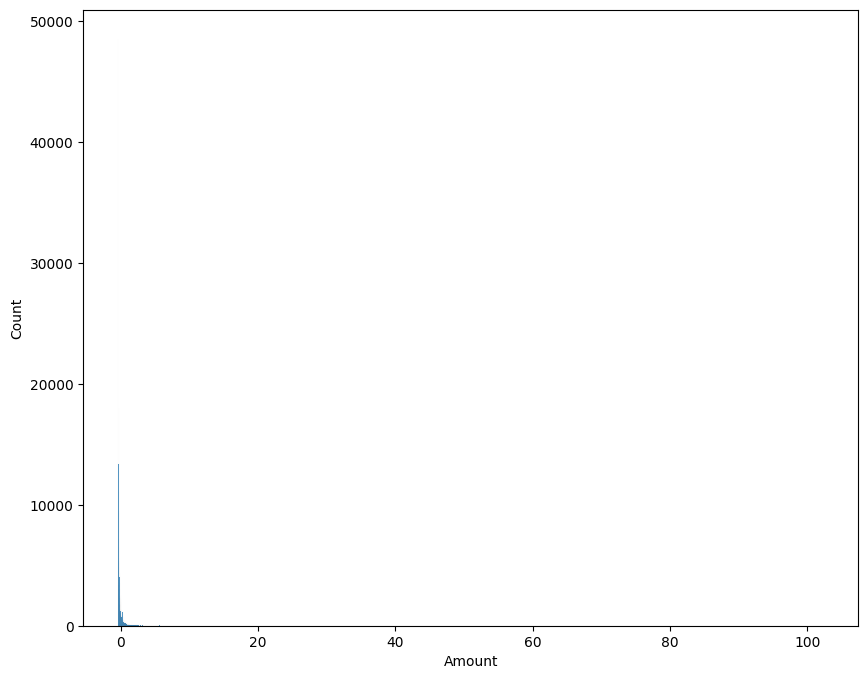

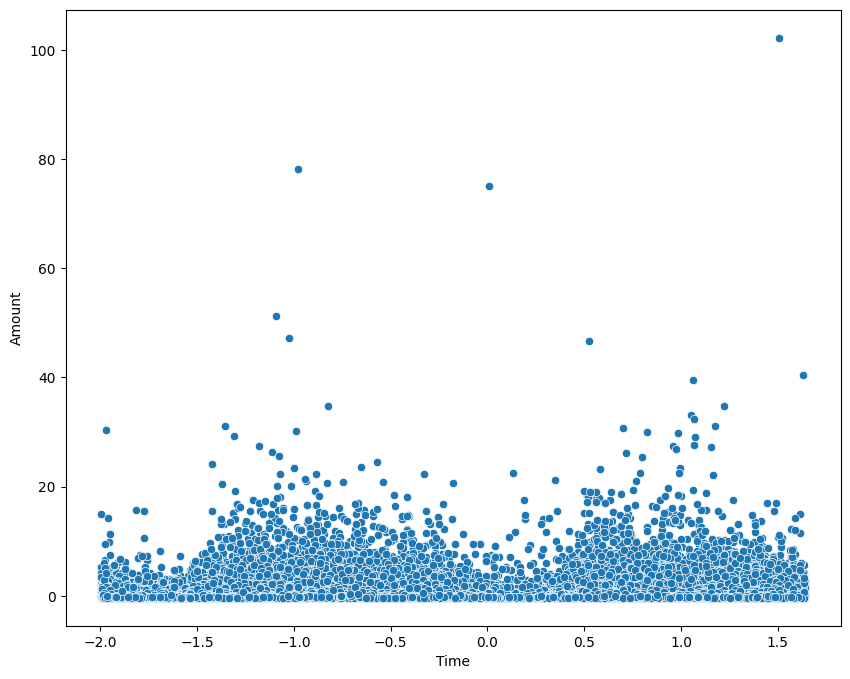

In [73]:
# Create a histogram of transaction amounts
plt.figure(figsize=(10,8))
sns.histplot(df['Amount'], kde=False)
plt.show()

# Create a scatter plot of transaction amounts vs. time
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Time', y='Amount')
plt.show()

The first part of the code creates a histogram of transaction amounts using the seaborn library's histplot function. It takes in the Amount column from the DataFrame df as its input data, and sets the kde parameter to False to display only the frequency counts of the data. The resulting plot shows the distribution of transaction amounts in the data.

The second part of the code creates a scatter plot of transaction amounts versus time using the seaborn library's scatterplot function. It takes in the Time and Amount columns from the DataFrame df as its input data, and plots them against each other. The resulting plot shows how transaction amounts are distributed over time.

In [74]:
# Select the 10 best features using recursive feature elimination
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(df.drop('Class', axis=1), df['Class'])

# Get the selected feature names
selected_features = df.drop('Class', axis=1).columns[rfe.support_]
print(selected_features)

Index(['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V23', 'V27'], dtype='object')


In this code snippet, a logistic regression model is created with a maximum of 1000 iterations. Recursive feature elimination (RFE) is then applied to select the 10 best features for the model. The RFE algorithm recursively removes the weakest feature(s) based on the coefficients of the logistic regression model until the specified number of features is reached. Finally, the names of the selected features are printed out.

The df.drop('Class', axis=1) part is used to drop the 'Class' column from the dataframe, as it is the target variable and should not be considered as a feature. The rfe.support_ attribute returns a boolean mask that is True for the selected features and False for the non-selected features. The columns attribute of the dataframe is then used to return the names of the selected features.


## Artificial Neural Network 

In [75]:
import tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [76]:
# X = df.iloc[:,:-1]
X = df[['V4', 'V8', 'V10', 'V13', 'V14', 'V16', 'V21', 'V22', 'V23', 'V27']]
y = df.Class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

n_inputs = len(X.columns)
print(n_inputs)


10


In [77]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
7094/7094 [==============================] - 29s 4ms/step - loss: 0.0112
Epoch 2/10
7094/7094 [==============================] - 26s 4ms/step - loss: 0.0040
Epoch 3/10
7094/7094 [==============================] - 24s 3ms/step - loss: 0.0036
Epoch 4/10
7094/7094 [==============================] - 26s 4ms/step - loss: 0.0034
Epoch 5/10
7094/7094 [==============================] - 25s 3ms/step - loss: 0.0031
Epoch 6/10
7094/7094 [==============================] - 27s 4ms/step - loss: 0.0031
Epoch 7/10
7094/7094 [==============================] - 27s 4ms/step - loss: 0.0030
Epoch 8/10
7094/7094 [==============================] - 28s 4ms/step - loss: 0.0029
Epoch 9/10
7094/7094 [==============================] - 36s 5ms/step - loss: 0.0029
Epoch 10/10
7094/7094 [==============================] - 40s 6ms/step - loss: 0.0028


In [78]:
from sklearn.metrics import roc_auc_score
y_pred = model.predict(X_test)
print(roc_auc_score(y_test, y_pred))

1774/1774 [==============================] - 9s 5ms/step
0.9823633379350893


### Weighted Neural Network with Keras 

* Define the weight
- Assign the weight

In [79]:
weights_assigned = {0:1, 1:595}

In [80]:
# define model
model = Sequential()
# define first hidden layer and visible layer
model.add(Dense(50,input_dim=n_inputs,activation='relu',kernel_initializer='he_uniform'))
# define output
model.add(Dense(1,activation='sigmoid'))
# define loss and optimiser
model.compile(loss='binary_crossentropy',optimizer= 'adam')
model.fit(X_train,y_train,class_weight=weights_assigned, epochs=10)

Epoch 1/10
7094/7094 [==============================] - 34s 4ms/step - loss: 0.5430
Epoch 2/10
7094/7094 [==============================] - 20s 3ms/step - loss: 0.3745
Epoch 3/10
7094/7094 [==============================] - 26s 4ms/step - loss: 0.3435
Epoch 4/10
7094/7094 [==============================] - 30s 4ms/step - loss: 0.3244
Epoch 5/10
7094/7094 [==============================] - 29s 4ms/step - loss: 0.3237
Epoch 6/10
7094/7094 [==============================] - 22s 3ms/step - loss: 0.2949
Epoch 7/10
7094/7094 [==============================] - 19s 3ms/step - loss: 0.2978
Epoch 8/10
7094/7094 [==============================] - 21s 3ms/step - loss: 0.2843
Epoch 9/10
7094/7094 [==============================] - 18s 3ms/step - loss: 0.2743
Epoch 10/10
7094/7094 [==============================] - 16s 2ms/step - loss: 0.2817


In [81]:
y_pred1 = model.predict(X_test)
print(roc_auc_score(y_test, y_pred1))

1774/1774 [==============================] - 3s 2ms/step
0.9834833947701379


### Save the Model

In [82]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
.........7
.........8
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-05-16 07:28:57         1394
metadata.json                                  2023-05-16 07:28:57           64
variables.h5                                   2023-05-16 07:28:57        23144


In [86]:
X.describe()

,V4,V8,V10,V13,V14,V16,V21,V22,V23,V27
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,-0.002966,-0.000854,-0.001441,0.000603,0.000252,0.001162,-0.000371,-0.000015,0.000198,0.001763
std,1.414184,1.179054,1.076407,0.995430,0.952215,0.873696,0.723909,0.724550,0.623702,0.395744
min,-5.683171,-73.216718,-24.588262,-5.791881,-19.214325,-14.129855,-34.830382,-10.933144,-44.807735,-22.565679
25%,-0.850134,-0.208828,-0.535578,-0.647862,-0.425732,-0.466860,-0.228305,-0.542700,-0.161703,-0.070641
50%,-0.022248,0.021898,-0.093237,-0.012927,0.050209,0.067119,-0.029441,0.006675,-0.011159,0.001479
75%,0.739647,0.325704,0.453619,0.663178,0.492336,0.523512,0.186194,0.528245,0.147748,0.091208
max,16.875344,20.007208,23.745136,7.126883,10.526766,17.315112,27.202839,10.503090,22.528412,31.612198


In [91]:
result = model.predict([[1,1,1,1,1,1,1,1,1,1]])

if result >= 0.5:
    print("fraud")
else:
    print("normal")

1/1 [==============================] - 0s 74ms/step
normal
